# Optimizar los gastos del Departamento de Marketing
## Introducción

A continuación se trabajará con tres archivos que contienen información para es ayudar a optimizar los gastos de marketing.

El contenido de los archivos para realizar el ananlisis es el siguiente:

 * Registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;

* Archivo de volcado con todos los pedidos del período;

* estadísticas de gastos de marketing.

Es necesario investigar los siguientes puntos:

1. Cómo la gente usa el producto

2. Cuándo empiezan a comprar;

3. Cuánto dinero trae cada cliente;

4. Cuándo pagan.


### Contenido:

* Carga de librerias

* Carga de archivos

* Preprocesamiento de datos.

Parte 1 Producto

¿Cuántas personas lo usan cada día, semana y mes?

¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

¿Cuál es la duración de cada sesión?

¿Con qué frecuencia los usuarios y las usuarias regresan?

Parte 2 Ventas

¿Cuándo la gente empieza a comprar? 

¿Cuántos pedidos hacen durante un período de tiempo dado?

¿Cuál es el tamaño promedio de compra?

¿Cuánto dinero traen? (LTV)

Parte 3 Marketing:

¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)

¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

¿Cuán rentables eran las inversiones? (ROMI)

Analisis por fuentes

Comparación de uso de devices

Costos por periodo por fuentes

Ganancias por fuente


* Conclusiones y recomendaciones 




### Carga de librerias

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns



In [2]:
try:
    costs_us=pd.read_csv('costs_us.csv')
    orders_log_us= pd.read_csv('orders_log_us.csv')
    visits_log_us= pd.read_csv('visits_log_us.csv')
except:
    costs_us=pd.read_csv('/datasets/costs_us.csv')
    orders_log_us=pd.read_csv('/datasets/orders_log_us.csv')
    visits_log_us=pd.read_csv('/datasets/visits_log_us.csv')


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

El notebook no compilaba, había un directorio mal anotado.
</div>

### Carga de los archivos

In [3]:
#costs_us=pd.read_csv('costs_us.csv')
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [4]:
#orders_log_us= pd.read_csv('orders_log_us.csv')
orders_log_us.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [5]:
#visits_log_us= pd.read_csv('visits_log_us.csv')
visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

El código no compilaba en varias partes, por favor revisar antes de enviar.
</div>


**Comentario del estudiante** en esta oportunidad revisé que el código compilara en la pagina, corrió completo

#### Exploración de archivos

Archivo costs_us

In [6]:
costs_us.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [7]:
costs_us['source_id'].value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

In [8]:
costs_us.duplicated().sum()

0

In [9]:
costs_us.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

Archivo orders

In [10]:
orders_log_us.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [11]:
orders_log_us.duplicated().sum()

0

In [12]:
orders_log_us.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Archivo visits_log_us

In [13]:
visits_log_us.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [14]:
visits_log_us.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [15]:
#Buscando duplicados en el archivo de visitas
visits_log_us.duplicated().sum()

0

In [16]:
visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Por lo observado en la exploración inicial de los archivos, se procederá de la forma siguiente:

* Cambio de tipo de datos de object a datetime en los dataframe visit_log_us y orders_log_us
* Cambio en la forma de escribir los nombres de las columnas para darle uniformidad a los encabezados, se eliminarán los espacios y serán reemplazados por undercase y se camnbiaran de mayusculas a minusculas.
* Cambio del tipo de datos de object a category en visits_log_us en la columna *Device*

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, me parece correcto.
</div>

#### Procesando los archivos

In [17]:
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [18]:
costs_us['dt']= pd.to_datetime(costs_us['dt'], format='%Y-%m-%d %H:%M:%S')
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Debes verificar si existen duplicados.
</div>

**Comentario del estudiante**
La revisión de los duplicados lo realicé en la parte de la exploración de los archivos

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, correcto!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Idealmente en esta parte también debieses revisar si la data corresponde al intervalo de tiempo que se desea estudiar.
</div>

In [19]:
orders_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [20]:
orders_log_us['Buy Ts']=pd.to_datetime(orders_log_us['Buy Ts'], format='%Y-%m-%d %H:%M:%S')
orders_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [21]:
#Cambiando los nombres de las columnas para eliminar los espacios y las mayusculas
orders_log_us.rename(columns={'Buy Ts':'buy_ts', 'Revenue':'revenue', 'Uid':'uid'}, inplace=True)


In [22]:
orders_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Debes verificar si existen duplicados.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Idealmente en esta parte también debieses revisar si la data corresponde al intervalo de tiempo que se desea estudiar.
</div>

**Comentario del estudiante**
Los duplicados los revisé en la sección de exploración de archivos

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, correcto!
</div>

In [23]:
visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [24]:
visits_log_us['End Ts']=pd.to_datetime(visits_log_us['End Ts'], format='%Y-%m-%d %H:%M:%S')

In [25]:
visits_log_us['Start Ts']=pd.to_datetime(visits_log_us['Start Ts'], format= '%Y-%m-%d %H:%M:%S')

La columna device le cambiare el tipo de dato para obtimizar el dataframe y disminuir el espacio que ocupa en memoria

In [26]:
visits_log_us['Device']=visits_log_us['Device'].astype('category')

In [27]:
visits_log_us.rename(columns={'Device':'device', 'End Ts':'end_ts', 'Source Id': 'source_id', 'Start Ts':'start_ts', 'Uid':'uid'}, inplace=True)

In [28]:
visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Debes verificar si existen duplicados.
</div>

**Comentario del estudiante**
Los duplicados los revisé en la sección de exploración de archivos

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, correcto!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Idealmente en esta parte también debieses revisar si la data corresponde al intervalo de tiempo que se desea estudiar. Además, verificar que los devices son pocos y por lo tanto vale la pena cambiar a categoría.
</div>

**Comentario del estudiante** explique porque el cambio del tipo de datos en la columna device, y la parte de verificación del intervalo de tiempo lo arregle más adelante, en la parte de los calculos del tamaño de los pedidos.

Analisis de los archivos.

### Parte 1. Producto

##### Cuantas personas lo usan cada día, semana y mes.

In [29]:
#1- Cálculo de usuarios por día (DAU)
visits_log_us['sessions_day']=visits_log_us['start_ts'].dt.day

In [30]:
visits_log_us['session_date']=visits_log_us['start_ts'].dt.date

In [31]:
visits_log_us['sessions_year']=visits_log_us['start_ts'].dt.year

In [32]:
visits_log_us.head()

,device,end_ts,source_id,start_ts,uid,sessions_day,session_date,sessions_year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-20,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-19,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-07-01,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-20,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,2017-12-27,2017


In [33]:
total_dau = visits_log_us.groupby('session_date').agg({'uid':'nunique'}).mean()
print(int(total_dau))

907


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

El cálculo de usuarios diarios debe ser por cada día de data registrada. En el código anterior seleccionaste el número de día en el mes y luego realizaste la media sobre todos estos, esto genera una media mucho mayor que la real.
</div>

**Comentario del estudiante**
Corregí el calculo del dua, utilizando la fecha del mes y no solo el día, tal como me indicaste

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, corregido!
</div>

In [34]:
#Cálculo de usuarios semanales (WAU)
visits_log_us['sessions_week']=visits_log_us['start_ts'].dt.week

/tmp/ipykernel_159/164742474.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits_log_us['sessions_week']=visits_log_us['start_ts'].dt.week


In [35]:
total_wau = visits_log_us.groupby(['sessions_year', 'sessions_week']).agg({'uid':'nunique'}).mean()
print(int(total_wau))

5716


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto. Aquí podría haber sucedido el mismo error que para los días. Sin embargo, como el dataset no contiene información en un lapso mayor a un año, no se repiten las semanas y por lo tanto el número obtenido es correcto (agregaste con mean, pero cada grupo tenía un solo valor, por lo tanto se obtuvo el número correcto). Nota como el DAU es similar al WAU, esto confirma que el cálculo de DAU debe corregirse.
</div>

In [36]:
#Cálculo de usuarios mensuales (MAU)
visits_log_us['sessions_month']=visits_log_us['start_ts'].dt.month

In [37]:
total_mau = visits_log_us.groupby(['sessions_year', 'sessions_month']).agg({'uid':'nunique'}).mean()
print(int(total_mau))

23228


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Está correcto, mismo comentario que para el WAU.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Por favor agrega un gráfico para el dau, wau y mau a lo largo del periodo de tiempo del análisis, para ver su comportamiento.
</div>

**Comentario del alumno** Listo agregados los graficos para el dau, wau y mau

In [38]:
dau=visits_log_us
dau.head()

,device,end_ts,source_id,start_ts,uid,sessions_day,session_date,sessions_year,sessions_week,sessions_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-20,2017,51,12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-19,2018,8,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-07-01,2017,26,7
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-20,2018,20,5
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,2017-12-27,2017,52,12


In [39]:
dau_plot=dau.groupby('session_date')['uid'].nunique()
dau_plot

session_date
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: uid, Length: 364, dtype: int64

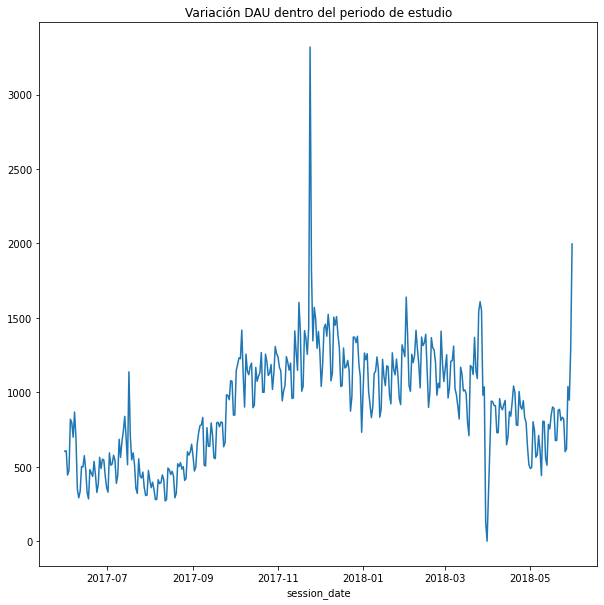

In [40]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
dau_plot.plot(kind='line')
pyplot.title('Variación DAU dentro del periodo de estudio')
pyplot.show()

Podemos observar la variación del DAU a través del periodo junio 2017 hasta mayo 2017. De septiembre 2017 a marzo 2018 se muestra un incremento que tiene su valor pico en más de 300 usuario por día. Después de marzo 2018 hay una disminución de estos valores.

In [41]:
mau_plot=dau.groupby(['sessions_year', 'sessions_month'])['uid'].nunique()
mau_plot.head()

sessions_year  sessions_month
2017           6                 13259
               7                 14183
               8                 11631
               9                 18975
               10                29692
Name: uid, dtype: int64

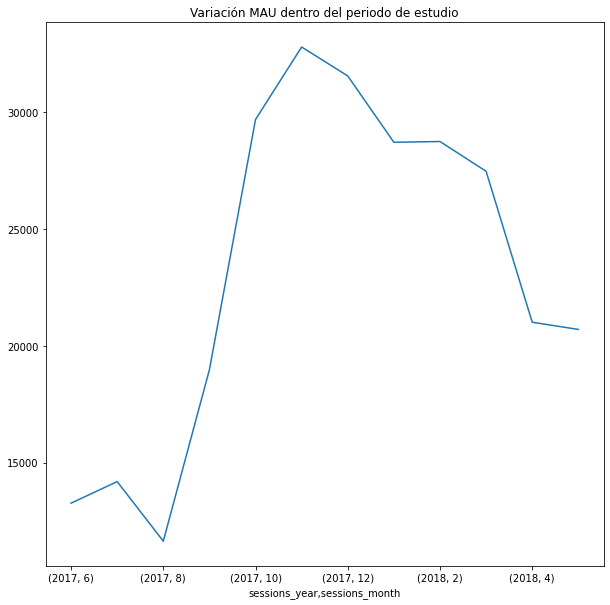

In [42]:
plt.figure(figsize=(10,10))
mau_plot.plot(kind='line')
pyplot.title('Variación MAU dentro del periodo de estudio')
pyplot.show()

El comportamiento del MAU tiene un comportamiento creciente a partir del mes de agosto del 2017 hasta noviembres del 2017 donde alcanza su máximo valor en más de 30000 sesiones. Apartir de esta fecha hay una disminución de esta métrica llegando a valores poco mayores a 20000.

In [43]:
wau_plot=dau.groupby(['sessions_year', 'sessions_week'])['uid'].nunique()
wau_plot.head()

sessions_year  sessions_week
2017           22               2021
               23               4129
               24               2812
               25               2878
               26               3064
Name: uid, dtype: int64

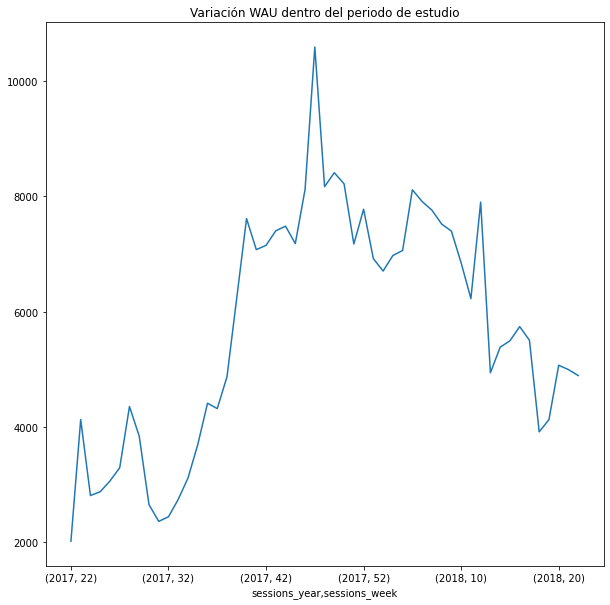

In [44]:
plt.figure(figsize=(10,10))
wau_plot.plot(kind='line')
pyplot.title('Variación WAU dentro del periodo de estudio')
pyplot.show()

En el rango de semanas desde la 32 hasta la 43 del año 2017 se comporta de forma creciente llegando a un numero de sesiones superiores a las 10000, a partir de la semana 43 comienza un descenso semana a semana, hasta llegar a los casi 5000 sesiones en la semana 22 del siguiente año.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

Excelente! Muy buenos gráficos
</div>

##### Cuantas sesiones hay por día

In [45]:
#Se calcula el el numero de sesiones por usuario en el periodo de tiempo de un día
sessions_per_users=visits_log_us.groupby('session_date').agg({'uid':['count', 'nunique']})

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

El error de la parte anterior genera un problema similar aquí.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, corregido
</div>

**Comentario del estudiante**
corregido el numero de sesiones por usuario por día

In [46]:
#Donde n_sessions= numero de sesiones y n_users= numero de usuarios, se divide el numero de sesiones entre el número de 
#usuarios y se obtiene el numero de sesiones por usuario promedio por día.
sessions_per_users.columns=['n_sessions','n_users' ]    #agrega dos encabezados de columnas
sessions_per_users['sessions_per_users']=(sessions_per_users['n_sessions'] / sessions_per_users['n_users'])
sessions_per_users

,n_sessions,n_users,sessions_per_users
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Por favor agrega un gráfico de las sesiones por usuarios a lo largo del rango de tiempo del análisis.
</div>

**Comentario del estudiante** Listo agregue el grafico de comportamiento de las sesiones por usuarios.

In [47]:
sessions_per_user_grouped=sessions_per_users.groupby('session_date')['sessions_per_users'].mean()
sessions_per_user_grouped

session_date
2017-06-01    1.097521
2017-06-02    1.082237
2017-06-03    1.071910
2017-06-04    1.071429
2017-06-05    1.089024
                ...   
2018-05-27    1.083871
2018-05-28    1.112608
2018-05-29    1.091772
2018-05-30    1.093871
2018-05-31    1.129695
Name: sessions_per_users, Length: 364, dtype: float64

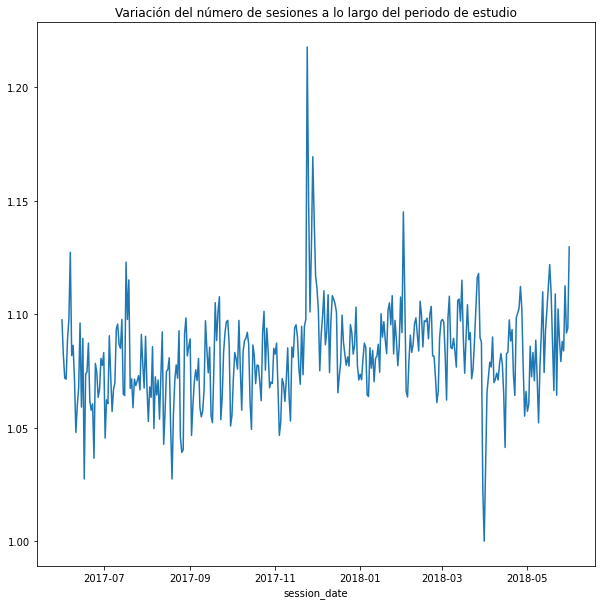

In [48]:
plt.figure(figsize=(10,10))
sessions_per_user_grouped.plot(kind='line')
pyplot.title('Variación del número de sesiones a lo largo del periodo de estudio')
pyplot.show()

El número de sesiones por usuarios diarios esta al rededor de de 1 hasta por arriba de los 1.20.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

Perfecto, se nota el peak en diciembre, probablemente debido a navidad.
</div>

##### Cuanto es la duración de las sesiones (ASL)

In [49]:
#El cálculo de la duración de la sesión se obtiene de la diferencia del final de la sesión menos el inicio de la sesión
#Se pasará todo a segundos, se aplicará la moda ya que este es el valor que más se repite.
visits_log_us['sessions_duration_sec']= (visits_log_us['end_ts'] - visits_log_us['start_ts']).dt.seconds 
asl=visits_log_us['sessions_duration_sec'].mode()
asl

0    60
dtype: int64

<AxesSubplot:>

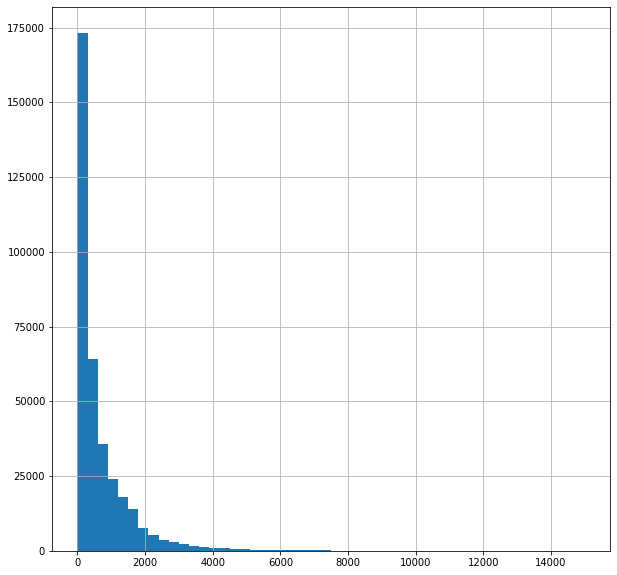

In [50]:
#Se graficará un histograma para observar el comportamiento
visits_log_us['sessions_duration_sec'].hist(bins=50, figsize=(10,10), range=(0,15000))

In [51]:
visits_log_us['sessions_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: sessions_duration_sec, dtype: float64

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

El gráfico y la moda están bien, sin embargo, faltan otros datos descriptores de la variable: media, cuartiles, etc.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, corregido!
</div>

**comentario del estudiante**
Agregué la descripción de la columna para obtener información adicional de la columna de la duración de la sesión en segundos.

Se puede observar que hay un pico de más de 170000 sesiones con duración 0 segundos, que luego van disminuyendo en número pero que van aumentando en tiempo de duración hasta tener visitas de apróximadamente unos 7500 segundos.

##### Frecuencia en que los usuarios regresan (sticky factor)

In [52]:
#Se calculara la frecuencia semanal de regreso al producto
sticky_factor_wau=(total_dau / total_wau)*100
sticky_factor_wau

uid    15.884409
dtype: float64

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Revisar según corrección de sección anterior.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, corregido!
</div>

**Comentario del estudiante**
Corregido el sticky_factor semanal con los calculos anteriores

In [53]:
#La frecuencia mensual de regreso al producto
sticky_factor_mau = (total_dau / total_mau)*100
sticky_factor_mau

uid    3.90897
dtype: float64

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

En esta parte se debe revisar con qué frecuencia los usuarios vuelven al sitio, es decir, cuál es la retención. Se debe realizar un cálculo de retención según mes de entrada con un análisis de cohortes.
</div>

**Comentario del estudiante**
Se realizó el analisis de cohorte de y se calculó la tasa de retención de los usuarios.

In [54]:
visits_log_us.head()

,device,end_ts,source_id,start_ts,uid,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-20,2017,51,12,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-19,2018,8,2,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-07-01,2017,26,7,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-20,2018,20,5,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,2017-12-27,2017,52,12,0


In [55]:
#Vamos a trabajar con el dataframe activity_users para no alterar el dataframe visits_log_us
activity_users=visits_log_us
activity_users.head()

,device,end_ts,source_id,start_ts,uid,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-20,2017,51,12,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-19,2018,8,2,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-07-01,2017,26,7,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-20,2018,20,5,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,2017-12-27,2017,52,12,0


In [56]:
activity_users['session_date']=activity_users['session_date'].astype("datetime64[ns]")

In [57]:
#Se creará la first_activity_date
first_activity_date=activity_users.groupby('uid')['session_date'].min()
first_activity_date.head()

uid
11863502262781    2018-03-01
49537067089222    2018-02-06
297729379853735   2017-06-07
313578113262317   2017-09-18
325320750514679   2017-09-30
Name: session_date, dtype: datetime64[ns]

In [58]:
first_activity_date.name='first_activity_date'
activity_users=activity_users.merge(first_activity_date, on='uid')
activity_users

,device,end_ts,source_id,start_ts,uid,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-20,2017,51,12,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-19,2018,8,2,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-07-01,2017,26,7,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-20,2018,20,5,1440,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,9,2018-03-09,2018,10,3,1680,2018-03-09
...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,23,2018-04-23,2018,17,4,480,2018-04-23
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,8,2017-11-08,2017,45,11,0,2017-11-08
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,31,2017-07-31,2017,31,7,1080,2017-07-31
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,20,2018-03-20,2018,12,3,840,2018-03-20


In [59]:
activity_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   device                 359400 non-null  category      
 1   end_ts                 359400 non-null  datetime64[ns]
 2   source_id              359400 non-null  int64         
 3   start_ts               359400 non-null  datetime64[ns]
 4   uid                    359400 non-null  uint64        
 5   sessions_day           359400 non-null  int64         
 6   session_date           359400 non-null  datetime64[ns]
 7   sessions_year          359400 non-null  int64         
 8   sessions_week          359400 non-null  int64         
 9   sessions_month         359400 non-null  int64         
 10  sessions_duration_sec  359400 non-null  int64         
 11  first_activity_date    359400 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](4), int64(6),

In [60]:
#Se creará la columna cohort_lifetime
activity_users['cohort_lifetime']=((activity_users['session_date']-activity_users['first_activity_date'])/np.timedelta64(1,'M')).astype(int)
activity_users

,device,end_ts,source_id,start_ts,uid,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec,first_activity_date,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-20,2017,51,12,1080,2017-12-20,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-19,2018,8,2,1680,2018-02-19,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-07-01,2017,26,7,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-20,2018,20,5,1440,2018-03-09,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,9,2018-03-09,2018,10,3,1680,2018-03-09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,23,2018-04-23,2018,17,4,480,2018-04-23,0
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,8,2017-11-08,2017,45,11,0,2017-11-08,0
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,31,2017-07-31,2017,31,7,1080,2017-07-31,0
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,20,2018-03-20,2018,12,3,840,2018-03-20,0


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Excelente!
</div>

In [61]:
#Se creará el dataframe cohorts
cohorts=activity_users.groupby(['first_activity_date', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_activity_date,cohort_lifetime,uid
0,2017-06-01,0,605
1,2017-06-01,1,65
2,2017-06-01,2,59
3,2017-06-01,3,62
4,2017-06-01,4,73


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Nota que esto calcula una cohorte para cada día, con lifetime mensual.
</div>

In [62]:
#Se calcularan los usuarios iniciales
initial_users_count=cohorts[cohorts['cohort_lifetime']==0][['first_activity_date', 'uid']]
initial_users_count=initial_users_count.rename(columns={'uid':'cohort_user'})
initial_users_count.head()

,first_activity_date,cohort_user
0,2017-06-01,605
12,2017-06-02,564
24,2017-06-03,411
36,2017-06-04,441
48,2017-06-05,746


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Aquí se obtuvieron los usuarios iniciales de cada cohorte diaria
</div>

In [63]:
#Se uniran los dos dataframes creados para tenes los usuarios iniciales y los de la cohorte actual
cohorts=cohorts.merge(initial_users_count, on='first_activity_date')
cohorts.head()

,first_activity_date,cohort_lifetime,uid,cohort_user
0,2017-06-01,0,605,605
1,2017-06-01,1,65,605
2,2017-06-01,2,59,605
3,2017-06-01,3,62,605
4,2017-06-01,4,73,605


In [64]:
#Ahora se puede realizar el calculo de la tasa de retención
cohorts['retention']=cohorts['uid']/cohorts['cohort_user']
cohorts.head()

,first_activity_date,cohort_lifetime,uid,cohort_user,retention
0,2017-06-01,0,605,605,1.000000
1,2017-06-01,1,65,605,0.107438
2,2017-06-01,2,59,605,0.097521
3,2017-06-01,3,62,605,0.102479
4,2017-06-01,4,73,605,0.120661


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

El lifetime es mensual y las cohortes son diarias y la retención es mensual para cada día. Esto genera un problema más adelante
</div>

In [65]:
#Se crea una función para extraer el mes
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)
#apply the function 
cohorts['first_activity_month'] = cohorts['first_activity_date'].apply(get_month)

cohorts.head()

,first_activity_date,cohort_lifetime,uid,cohort_user,retention,first_activity_month
0,2017-06-01,0,605,605,1.000000,2017-06-01
1,2017-06-01,1,65,605,0.107438,2017-06-01
2,2017-06-01,2,59,605,0.097521,2017-06-01
3,2017-06-01,3,62,605,0.102479,2017-06-01
4,2017-06-01,4,73,605,0.120661,2017-06-01


In [66]:
retention_pivot=cohorts.pivot_table(index='first_activity_month', columns='cohort_lifetime', values='retention', aggfunc='mean')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.056588,0.054364,0.064351,0.065369,0.065588,0.057368,0.053394,0.051933,0.044704,0.038133,0.030107
2017-07-01,1.0,0.050596,0.055690,0.053023,0.055067,0.045499,0.046359,0.042433,0.030015,0.027625,0.017613,NaN
2017-08-01,1.0,0.060334,0.059903,0.057939,0.044135,0.041880,0.040167,0.030619,0.026053,0.015413,NaN,NaN
2017-09-01,1.0,0.067022,0.064005,0.041675,0.039768,0.037642,0.029403,0.023975,0.012343,NaN,NaN,NaN
2017-10-01,1.0,0.062513,0.043664,0.038273,0.034084,0.024939,0.020245,0.011473,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.050266,0.040892,0.036133,0.026838,0.021509,0.011823,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.044557,0.034169,0.023209,0.020165,0.010216,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.043509,0.030066,0.021843,0.010120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.034544,0.022605,0.009957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ahora las cohortes se cambiaron a mensuales según el promedio diario. Si bien esto podría ser un buen indicador del comportamiento de las cohortes mensuales, no son las retenciones mensuales reales.
    
De todas formas, la pregunta me parece un poco abierta, así que no consideraré esto incorrecto, tal vez es poco exacto solamente.
</div>

In [67]:
cohorts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2352
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   first_activity_date   2353 non-null   datetime64[ns]
 1   cohort_lifetime       2353 non-null   int64         
 2   uid                   2353 non-null   int64         
 3   cohort_user           2353 non-null   int64         
 4   retention             2353 non-null   float64       
 5   first_activity_month  2353 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 128.7 KB


<AxesSubplot:title={'center':'Cohorts: users retention'}, xlabel='cohort_lifetime', ylabel='first_activity_month'>

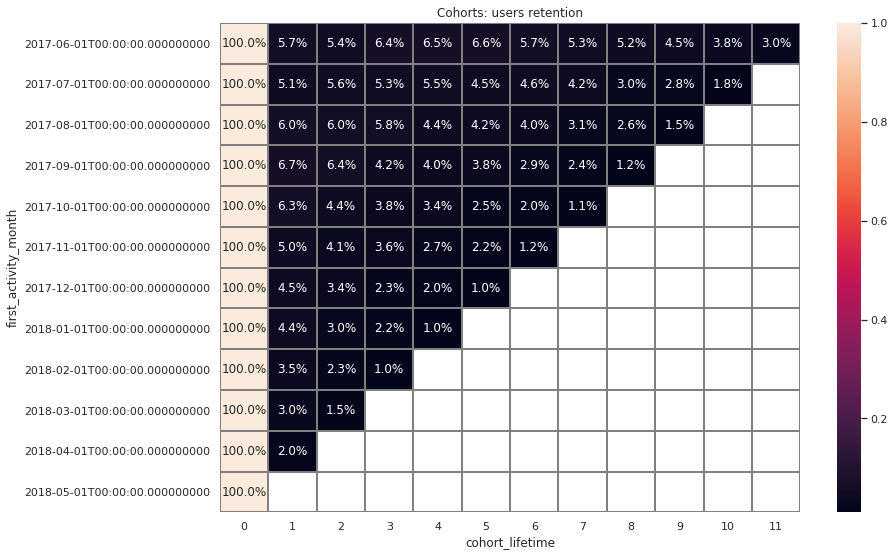

In [68]:
from matplotlib import pyplot as plt
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: users retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'
) 



Conclusiones

* En promedio hay una sesión por usuario diaria y se mantuvo aproximadamente constante entre los años 2017 y 2018.

* La duración promedio de la sesión es de 60 segundos.

* La frecuencia en que regresan los usuarios es del 15% semanalmente y del 22% mesualmente.

* El número de usuarios diarios es de 907, el número de usuarios mensuales alcanza los 23228.

* En general para todas las cohortes la tasa de retención de usuarios es baja

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Me parecen bien tus conclusiones en base a lo expuesto.
</div>

**comentario del estudiante**
Actualizadas las conclusiones con los valores nuevos

### Parte 2. Ventas

##### Determinar en que momento comienzan los usuarios a comprar

In [69]:
first_vists=visits_log_us.groupby('uid')['start_ts'].min()
first_vists.name='first_visit'
first_vists

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: first_visit, Length: 228169, dtype: datetime64[ns]

In [70]:
#Se buscará con el archivo orders la fecha de la primera compra
first_order_dates = orders_log_us.groupby('uid')['buy_ts'].min()
first_order_dates.name='first_order_datetime'
first_order_dates

uid
313578113262317        2018-01-03 21:51:00
1575281904278712       2017-06-03 10:13:00
2429014661409475       2017-10-11 18:33:00
2464366381792757       2018-01-28 15:54:00
2551852515556206       2017-11-24 10:14:00
                               ...        
18445147675727495770   2017-11-24 09:03:00
18445407535914413204   2017-09-22 23:55:00
18445601152732270159   2018-03-26 22:54:00
18446156210226471712   2018-02-18 19:34:00
18446167067214817906   2017-10-17 10:16:00
Name: first_order_datetime, Length: 36523, dtype: datetime64[ns]

In [71]:
#Se creará una tabla con los dos dataframes agrupados anteriormente para contener la primera fecha de compra y de visita
#con el dataframe orders_log_us
orders_and_first_order_dates=orders_log_us.merge(first_order_dates, on='uid')
orders_and_first_order_dates

,buy_ts,revenue,uid,first_order_datetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00


In [72]:
orders_orders_and_visit_dates=orders_and_first_order_dates.merge(first_vists, on='uid')
orders_orders_and_visit_dates

,buy_ts,revenue,uid,first_order_datetime,first_visit
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00


In [73]:
#Se va a crear la columna de order_month para ir que se utilizará para crear la cohorte
#Se crea una función para extraer el mes
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)
#apply the function 
orders_orders_and_visit_dates['order_month'] = orders_orders_and_visit_dates['buy_ts'].apply(get_month)

orders_orders_and_visit_dates.head()

,buy_ts,revenue,uid,first_order_datetime,first_visit,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01


In [74]:
orders_orders_and_visit_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   buy_ts                50415 non-null  datetime64[ns]
 1   revenue               50415 non-null  float64       
 2   uid                   50415 non-null  uint64        
 3   first_order_datetime  50415 non-null  datetime64[ns]
 4   first_visit           50415 non-null  datetime64[ns]
 5   order_month           50415 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), uint64(1)
memory usage: 2.7 MB


In [75]:
#Se crea la columna visit_month
#Se crea una función para extraer el mes
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)
#apply the function 
orders_orders_and_visit_dates['first_visit_month'] = orders_orders_and_visit_dates['first_visit'].apply(get_month)

orders_orders_and_visit_dates.head()

,buy_ts,revenue,uid,first_order_datetime,first_visit,order_month,first_visit_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01,2017-06-01


In [76]:
orders_orders_and_visit_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   buy_ts                50415 non-null  datetime64[ns]
 1   revenue               50415 non-null  float64       
 2   uid                   50415 non-null  uint64        
 3   first_order_datetime  50415 non-null  datetime64[ns]
 4   first_visit           50415 non-null  datetime64[ns]
 5   order_month           50415 non-null  datetime64[ns]
 6   first_visit_month     50415 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), uint64(1)
memory usage: 3.1 MB


In [77]:
#A continuación se calculara el tiempo de conversion restando la fecha de la primera orden menos el tiempo de la
#primera visita

orders_orders_and_visit_dates['time_convertion']=orders_orders_and_visit_dates['first_order_datetime']-orders_orders_and_visit_dates['first_visit']
orders_orders_and_visit_dates.head()

,buy_ts,revenue,uid,first_order_datetime,first_visit,order_month,first_visit_month,time_convertion
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,2017-06-01,0 days 00:01:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days 00:11:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01,2017-06-01,0 days 00:02:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days 00:15:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01,2017-06-01,0 days 00:27:00


In [78]:
orders_orders_and_visit_dates['day_convertion']=(orders_orders_and_visit_dates['time_convertion'] / np.timedelta64(1, 'D')).astype('int')
orders_orders_and_visit_dates.tail()

,buy_ts,revenue,uid,first_order_datetime,first_visit,order_month,first_visit_month,time_convertion,day_convertion
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,2018-05-01,2018-05-01,0 days 14:39:00,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,2018-05-01,2018-05-01,0 days 00:45:00,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,2018-05-01,2018-05-01,0 days 00:02:00,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,2018-05-01,2017-10-01,220 days 11:24:00,220
50414,2018-06-01 00:02:00,3.42,83872787173869366,2018-06-01 00:02:00,2018-05-31 23:59:00,2018-06-01,2018-05-01,0 days 00:03:00,0


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, esto no es totalmente incorrecto, pero es mejor usar .astype('int') en vez de round(), puesto que el primero trunca los valores y el segundo los redondea, haciendo que por ejemplo los que compraron al día + 13 horas, pasen para el día 2.
</div>

**Comentario del estudiante** Cambié de round() a astype('int)

<AxesSubplot:>

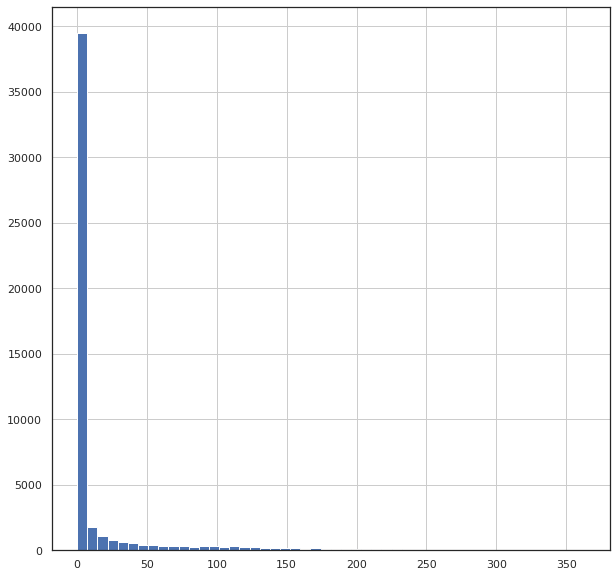

In [79]:
orders_orders_and_visit_dates['day_convertion'].hist(bins=50, figsize=(10,10))

In [80]:
orders_orders_and_visit_dates['day_convertion'].describe()

count    50415.000000
mean        17.419677
std         46.352290
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        363.000000
Name: day_convertion, dtype: float64

Podemos observar que el tiempo mínimo de conversión es de 0 días y el máximo es de 363 días, el tiempo promedio de conversión es de 17 días.

In [81]:
#Este valor lo voy a eliminar ya que es solo uno, que corresponde al último mes de los datos dentro del dataset de 
#orders, lo que al hacer la matriz por usuarios, genera una columna sin valores en las filas anteriores y solo el valor
#1 en la correspondiente. 
orders_orders_and_visit_dates.loc[orders_orders_and_visit_dates['order_month']=='2018-06-01']

,buy_ts,revenue,uid,first_order_datetime,first_visit,order_month,first_visit_month,time_convertion,day_convertion
50414,2018-06-01 00:02:00,3.42,83872787173869366,2018-06-01 00:02:00,2018-05-31 23:59:00,2018-06-01,2018-05-01,0 days 00:03:00,0


In [82]:
orders_orders_and_visit_dates.drop([50414], axis=0, inplace=True)

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Buen trabajo
</div>

##### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [83]:
#Se crea una función para extraer el mes
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)
#apply the function 
orders_orders_and_visit_dates['first_order_month'] = orders_orders_and_visit_dates['first_order_datetime'].apply(get_month)

orders_orders_and_visit_dates.head()

,buy_ts,revenue,uid,first_order_datetime,first_visit,order_month,first_visit_month,time_convertion,day_convertion,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,2017-06-01,0 days 00:01:00,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days 00:11:00,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01,2017-06-01,0 days 00:02:00,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days 00:15:00,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01,2017-06-01,0 days 00:27:00,0,2017-06-01


In [84]:
purchases_by_cohort=orders_orders_and_visit_dates.pivot_table(index='first_order_month', columns='order_month', values='uid', aggfunc='count')


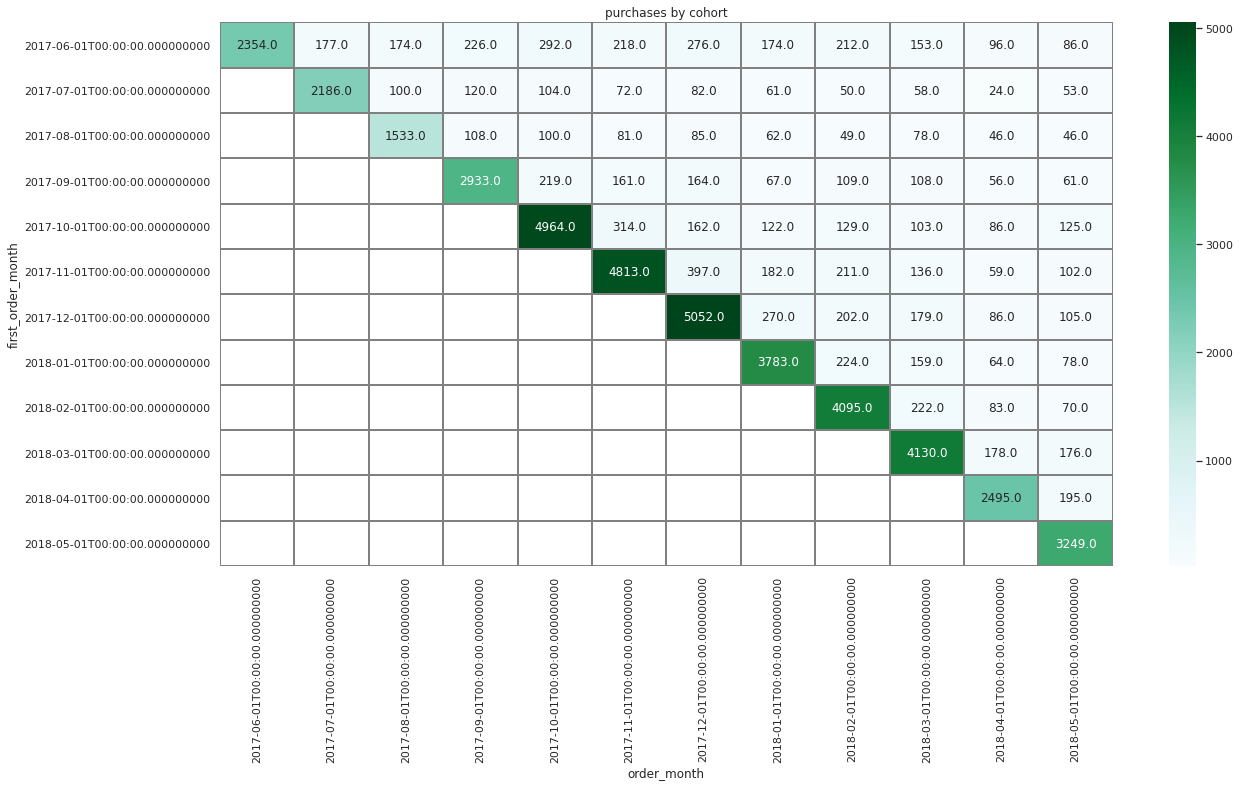

In [85]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(purchases_by_cohort, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='BuGn', ax=ax)

plt.title('purchases by cohort')

#plt.figure(figsize=(100,20))
plt.show()

Se puede obesevar que las cohorts con mayores pedidos al inicio son las 10-2017, 11-2017, y 12-2017, en general todas las cohorts después del mes 0 tienden a disminuir el número de pedidos.

In [86]:
#Ahora se va a calcular el lifetime de la cohorte
orders_orders_and_visit_dates['cohort_lifetime']=(orders_orders_and_visit_dates['order_month']-orders_orders_and_visit_dates['first_order_month'])/ np.timedelta64(1, 'M')
orders_orders_and_visit_dates.tail()

,buy_ts,revenue,uid,first_order_datetime,first_visit,order_month,first_visit_month,time_convertion,day_convertion,first_order_month,cohort_lifetime
50409,2018-05-31 23:43:00,3.67,1805512004303848280,2018-05-31 23:43:00,2017-12-07 23:20:00,2018-05-01,2017-12-01,175 days 00:23:00,175,2018-05-01,0.0
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,2018-05-01,2018-05-01,0 days 14:39:00,0,2018-05-01,0.0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,2018-05-01,2018-05-01,0 days 00:45:00,0,2018-05-01,0.0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,2018-05-01,2018-05-01,0 days 00:02:00,0,2018-05-01,0.0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,2018-05-01,2017-10-01,220 days 11:24:00,220,2018-05-01,0.0


In [87]:
#Revisando los valores obtenidos dentro de la columna cohort_lifetime
orders_orders_and_visit_dates['cohort_lifetime'].value_counts()

0.000000     41587
1.018501      1194
0.985647       988
2.004148       955
3.022649       744
5.026797       471
4.008296       444
2.037003       322
6.012444       276
4.961087       267
6.965235       259
2.956940       243
1.938438       242
0.919937       222
3.942586       214
8.049447       212
5.946734       210
4.041151       201
8.969383       199
7.030945       174
2.989794       164
9.987885       149
6.045299       110
7.983737       104
5.979589        86
10.973531       86
3.975441        86
2.924085        70
7.950882        61
7.063800        50
9.002238        24
Name: cohort_lifetime, dtype: int64

In [88]:
#Vamos a aplicar el método round() para tener solo los números sin decimales
orders_orders_and_visit_dates['cohort_lifetime']=orders_orders_and_visit_dates['cohort_lifetime'].round()

In [89]:
#Vamos a compilar una tabla dinamica para ver el ciclo de vida de la cohorte
cohort_lifetime=orders_orders_and_visit_dates.pivot_table(index='first_order_month', columns='cohort_lifetime', values='uid', aggfunc='count')

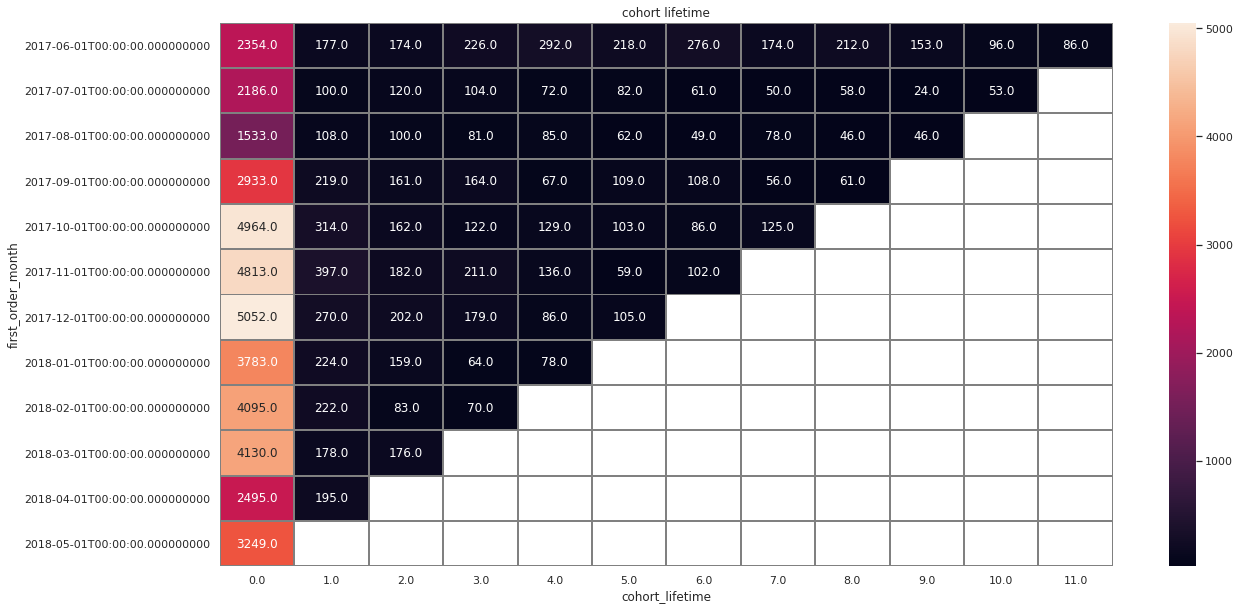

In [90]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(cohort_lifetime, annot=True, fmt='.1f', linewidths=1, linecolor='gray', ax=ax)
sns.dark_palette("#69d", reverse=True, as_cmap=True)

plt.title('cohort lifetime')

#plt.figure(figsize=(100,20))
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Excelente, muy buen trabajo en esta parte. También se puede mostrar el promedio de compras por usuario.
</div>

In [91]:
#¿Cuál es el tamaño promedio de compra?
mean_purchase=orders_orders_and_visit_dates.pivot_table(index='first_order_month', columns='cohort_lifetime', 
                                                            values='revenue', aggfunc='mean')

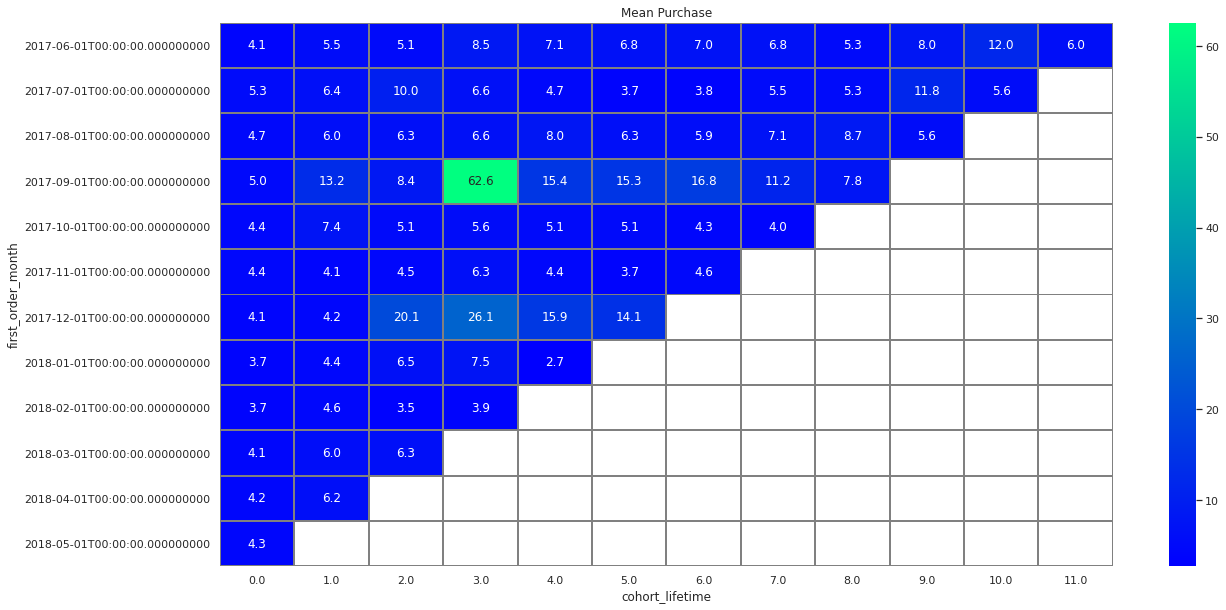

In [92]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(mean_purchase, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='winter', ax=ax)

plt.title('Mean Purchase')

#plt.figure(figsize=(100,20))
plt.show()

Las compras promedio son muy parecidas en el tamaño de la compra, la cohort del 09-2017 muestra un valor alto en el tercer mes, la cohort del 12-2017 a partir del mes dos se observa un aumentoe en el tamaño de la compra.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Correcto, muy bien!
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

El dataframe tiene la información que necesitamos pero repetida. Nota que en un principio tomaste todas las ordenes y les uniste la primera orden y luego le uniste las visitas. En realidad, solamente necesitamos la primera orden y la primera visita, en esta tabla eso esta repetido para cada orden que hizo el usuario. Debes corregir esto antes de avanzar.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Corregido más adelante
</div>

**Comentario del estudiante** Realicé los calculos nuevamente de esta sección, las celdas que estan comentadas las deje así en caso que tenga que volver sobre ellas, los cálculos nuevos estan en la parte superior a este comentario

##### ¿Cuánto dinero traen? (LTV)

In [93]:
revenue_grouped_by_cohort=orders_orders_and_visit_dates.groupby(['first_order_month', 'cohort_lifetime'])['revenue'].median().reset_index()
revenue_grouped_by_cohort.rename(columns={'revenue':'median_revenue_per_cohort_and_lifetime'}, inplace=True)
revenue_grouped_by_cohort

,first_order_month,cohort_lifetime,median_revenue_per_cohort_and_lifetime
0,2017-06-01,0.0,2.44
1,2017-06-01,1.0,3.60
2,2017-06-01,2.0,3.05
3,2017-06-01,3.0,4.28
4,2017-06-01,4.0,3.30
...,...,...,...
73,2018-03-01,1.0,2.20
74,2018-03-01,2.0,2.87
75,2018-04-01,0.0,2.78
76,2018-04-01,1.0,3.05


In [94]:
purchases_number=orders_orders_and_visit_dates.groupby(['first_order_month', 'cohort_lifetime'])['uid'].count().reset_index()
purchases_number.rename(columns={'uid':'number_of_orders'}, inplace=True)
purchases_number

,first_order_month,cohort_lifetime,number_of_orders
0,2017-06-01,0.0,2354
1,2017-06-01,1.0,177
2,2017-06-01,2.0,174
3,2017-06-01,3.0,226
4,2017-06-01,4.0,292
...,...,...,...
73,2018-03-01,1.0,178
74,2018-03-01,2.0,176
75,2018-04-01,0.0,2495
76,2018-04-01,1.0,195


In [95]:
merge_purchase_and_revenue=purchases_number.merge(revenue_grouped_by_cohort, on=['first_order_month','cohort_lifetime'])
merge_purchase_and_revenue

,first_order_month,cohort_lifetime,number_of_orders,median_revenue_per_cohort_and_lifetime
0,2017-06-01,0.0,2354,2.44
1,2017-06-01,1.0,177,3.60
2,2017-06-01,2.0,174,3.05
3,2017-06-01,3.0,226,4.28
4,2017-06-01,4.0,292,3.30
...,...,...,...,...
73,2018-03-01,1.0,178,2.20
74,2018-03-01,2.0,176,2.87
75,2018-04-01,0.0,2495,2.78
76,2018-04-01,1.0,195,3.05


In [96]:
merge_purchase_and_revenue['uid_revenue']=merge_purchase_and_revenue['number_of_orders']*merge_purchase_and_revenue['median_revenue_per_cohort_and_lifetime']
merge_purchase_and_revenue.rename(columns={'uid_revenue':'revenue_per_cohort'}, inplace=True)
merge_purchase_and_revenue

,first_order_month,cohort_lifetime,number_of_orders,median_revenue_per_cohort_and_lifetime,revenue_per_cohort
0,2017-06-01,0.0,2354,2.44,5743.76
1,2017-06-01,1.0,177,3.60,637.20
2,2017-06-01,2.0,174,3.05,530.70
3,2017-06-01,3.0,226,4.28,967.28
4,2017-06-01,4.0,292,3.30,963.60
...,...,...,...,...,...
73,2018-03-01,1.0,178,2.20,391.60
74,2018-03-01,2.0,176,2.87,505.12
75,2018-04-01,0.0,2495,2.78,6936.10
76,2018-04-01,1.0,195,3.05,594.75


In [97]:
uid_nunique=orders_orders_and_visit_dates.groupby(['first_order_month', 'cohort_lifetime'])['uid'].agg('nunique').reset_index()
uid_nunique.rename(columns={'uid':'user_unique'}, inplace=True)
uid_nunique

,first_order_month,cohort_lifetime,user_unique
0,2017-06-01,0.0,2023
1,2017-06-01,1.0,61
2,2017-06-01,2.0,50
3,2017-06-01,3.0,54
4,2017-06-01,4.0,88
...,...,...,...
73,2018-03-01,1.0,90
74,2018-03-01,2.0,58
75,2018-04-01,0.0,2276
76,2018-04-01,1.0,69


In [98]:
merge_purchase_and_revenue_with_useru=merge_purchase_and_revenue.merge(uid_nunique, on=['first_order_month', 'cohort_lifetime'])
merge_purchase_and_revenue_with_useru

,first_order_month,cohort_lifetime,number_of_orders,median_revenue_per_cohort_and_lifetime,revenue_per_cohort,user_unique
0,2017-06-01,0.0,2354,2.44,5743.76,2023
1,2017-06-01,1.0,177,3.60,637.20,61
2,2017-06-01,2.0,174,3.05,530.70,50
3,2017-06-01,3.0,226,4.28,967.28,54
4,2017-06-01,4.0,292,3.30,963.60,88
...,...,...,...,...,...,...
73,2018-03-01,1.0,178,2.20,391.60,90
74,2018-03-01,2.0,176,2.87,505.12,58
75,2018-04-01,0.0,2495,2.78,6936.10,2276
76,2018-04-01,1.0,195,3.05,594.75,69


In [99]:
merge_purchase_and_revenue_with_useru['revenue_per_user_cohort_and_age']=merge_purchase_and_revenue_with_useru['revenue_per_cohort'] / merge_purchase_and_revenue_with_useru['user_unique']
merge_purchase_and_revenue_with_useru

,first_order_month,cohort_lifetime,number_of_orders,median_revenue_per_cohort_and_lifetime,revenue_per_cohort,user_unique,revenue_per_user_cohort_and_age
0,2017-06-01,0.0,2354,2.44,5743.76,2023,2.839229
1,2017-06-01,1.0,177,3.60,637.20,61,10.445902
2,2017-06-01,2.0,174,3.05,530.70,50,10.614000
3,2017-06-01,3.0,226,4.28,967.28,54,17.912593
4,2017-06-01,4.0,292,3.30,963.60,88,10.950000
...,...,...,...,...,...,...,...
73,2018-03-01,1.0,178,2.20,391.60,90,4.351111
74,2018-03-01,2.0,176,2.87,505.12,58,8.708966
75,2018-04-01,0.0,2495,2.78,6936.10,2276,3.047496
76,2018-04-01,1.0,195,3.05,594.75,69,8.619565


In [100]:
pivot_table_ltv=merge_purchase_and_revenue_with_useru.pivot_table(index='first_order_month', columns='cohort_lifetime', 
                                                  values='median_revenue_per_cohort_and_lifetime', aggfunc='sum')


In [101]:
pivot_table_ltv.cumsum(axis=1)

cohort_lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,2.440,6.040,9.09,13.370,16.670,19.110,22.160,25.210,28.600,32.270,36.55,38.38
2017-07-01,3.050,5.860,9.71,12.760,15.140,17.580,20.020,23.605,25.870,30.510,34.18,NaN
2017-08-01,2.750,6.540,10.21,14.490,19.070,22.740,25.790,28.840,33.575,36.995,NaN,NaN
2017-09-01,2.440,7.330,10.26,15.790,18.720,23.610,27.005,30.490,34.400,NaN,NaN,NaN
2017-10-01,2.440,5.190,7.88,10.600,13.900,16.520,18.900,21.470,NaN,NaN,NaN,NaN
2017-11-01,2.440,4.390,6.22,9.400,11.490,13.930,17.045,NaN,NaN,NaN,NaN,NaN
2017-12-01,2.665,5.075,8.04,11.090,13.445,15.885,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,2.440,4.880,7.32,10.370,12.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,2.440,4.880,7.21,9.475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


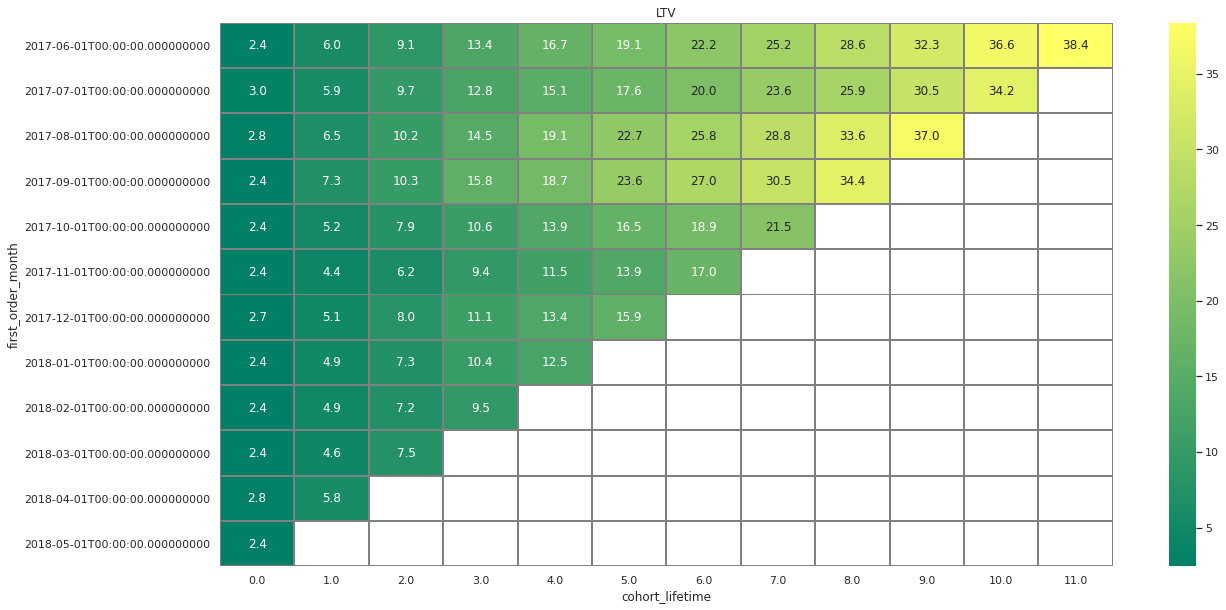

In [102]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(pivot_table_ltv.cumsum(axis=1), annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='summer', ax=ax)

plt.title('LTV')

#plt.figure(figsize=(100,20))
plt.show()

En general las cohortes presentan crecimiento a medida que se van volviendo más maduras

In [103]:
mean_purchase.cumsum(axis=1)

cohort_lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.060106,9.607112,14.695273,23.240848,30.325026,37.150347,44.116796,50.878636,56.157645,64.167514,76.205639,82.247732
2017-07-01,5.287123,11.733223,21.725306,28.362902,33.084708,36.744220,40.533728,45.988128,51.333818,63.123818,68.772120,NaN
2017-08-01,4.715479,10.702794,16.983994,23.601896,31.564837,37.830159,43.720159,50.833749,59.536575,65.135053,NaN,NaN
2017-09-01,4.967109,18.138296,26.489352,89.059596,104.490044,119.811878,136.579008,147.785615,155.571189,NaN,NaN,NaN
2017-10-01,4.374738,11.779866,16.907335,22.497581,27.596573,32.668126,36.948359,40.957479,NaN,NaN,NaN,NaN
2017-11-01,4.370717,8.474671,12.949342,19.234318,23.675789,27.402568,32.000804,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.110746,8.337487,28.410259,54.494617,70.443105,84.554153,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3.687417,8.125900,14.580868,22.105712,24.816994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,3.706266,8.282753,11.736488,15.603630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, tu desarrollo está correcto, pero creo que te diste demasiadas vueltas y ya tenías todo lo necesario ne la primera celda de la sección, luego había que construir la pivot table. En próximas iteraciones por favor limpia lo que no fue necesario para que sea más fácil entender tu trabajo.
</div>

**Comentario del estudiante** Limpié las celdas que no se estaban utilizando

### Parte 3 Marketing

In [104]:
#Veremos el archivo de costos
costs_us.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [105]:

#Explorando el dataframe costs_us
costs_us.value_counts()

source_id  dt          costs 
1          2017-06-01  75.20     1
5          2018-02-01  298.58    1
           2018-01-25  189.62    1
           2018-01-26  151.74    1
           2018-01-27  152.74    1
                                ..
3          2017-10-01  448.54    1
           2017-10-02  558.33    1
           2017-10-03  620.70    1
           2017-10-04  497.16    1
10         2018-05-31  17.60     1
Length: 2542, dtype: int64

In [106]:
costs_us['source_id'].value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

##### ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)

In [107]:
#Extrayendo el mes de la columna dt y guardandola en la columna month 
costs_us['month']=costs_us['dt'].dt.month
costs_us.head(10)

,source_id,dt,costs,month
0,1,2017-06-01,75.20,6
1,1,2017-06-02,62.25,6
2,1,2017-06-03,36.53,6
3,1,2017-06-04,55.00,6
4,1,2017-06-05,57.08,6
5,1,2017-06-06,40.39,6
6,1,2017-06-07,40.59,6
7,1,2017-06-08,56.63,6
8,1,2017-06-09,40.16,6
9,1,2017-06-10,43.24,6


In [108]:
investment_by_source=costs_us.groupby('source_id').agg(total_investment=('costs', 'sum'))
investment_by_source

,total_investment
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


<AxesSubplot:title={'center':'Total Investment by Source Id'}, xlabel='source_id'>

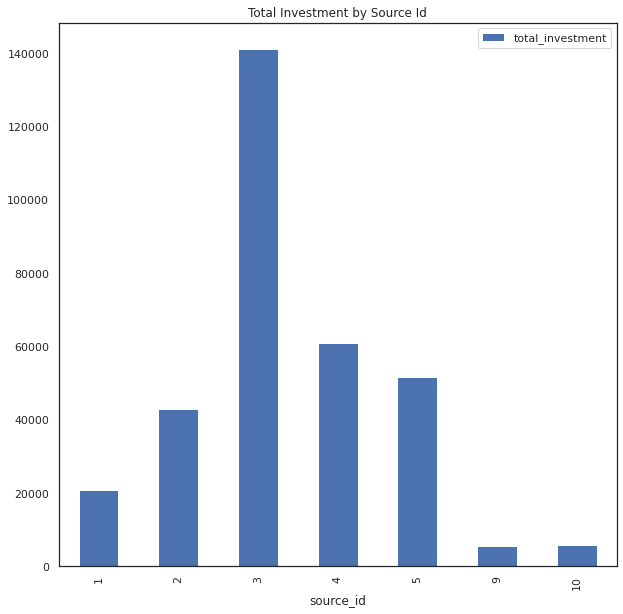

In [109]:
investment_by_source.plot(kind='bar', figsize=(10,10), title='Total Investment by Source Id')

La fuente número 3 es la que más ha recibido inversiones totales, respecto de las otras a lo largo del tiempo.

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok con el costo total y por fuente, pero que hay del costo a lo largo del tiempo?
</div>

**Comentario del estudiante** Realicé el grafico de costos por día a través del periodo en estudio

In [110]:
cost_thru_time= costs_us.groupby('dt')['costs'].mean()
cost_thru_time

dt
2017-06-01    105.037143
2017-06-02    103.027143
2017-06-03     64.407143
2017-06-04    108.737143
2017-06-05    117.348571
                 ...    
2018-05-27     76.124286
2018-05-28     88.491429
2018-05-29    112.112857
2018-05-30    169.000000
2018-05-31    307.671429
Name: costs, Length: 364, dtype: float64

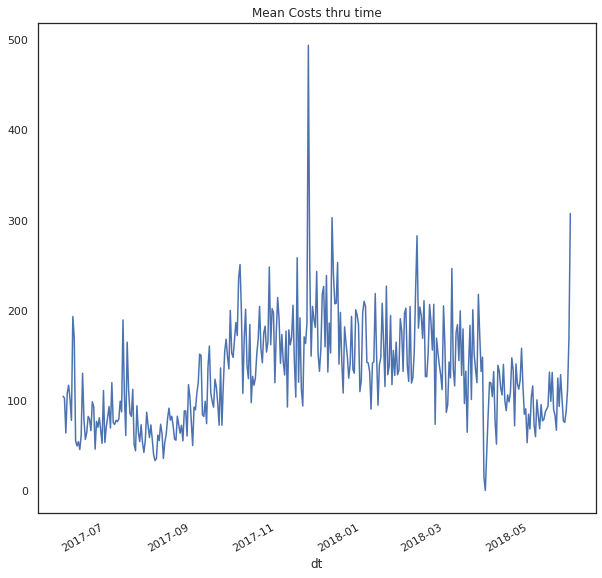

In [111]:
plt.figure(figsize=(10,10))
cost_thru_time.plot(kind='line')
pyplot.title('Mean Costs thru time')
pyplot.show()

La grafica muestra el costo promedio diario durante el periodo estudiado, en el mes de diciembre 2017 se observa un pico de casi 500. 

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

Muy bien
</div>

##### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

In [112]:
visits_log_us.head()

,device,end_ts,source_id,start_ts,uid,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-20,2017,51,12,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-19,2018,8,2,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-07-01,2017,26,7,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-20,2018,20,5,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,2017-12-27,2017,52,12,0


In [113]:
#Se crea una copia llamada visit para trabajar esta sección
visit=visits_log_us
visit.head()

,device,end_ts,source_id,start_ts,uid,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-20,2017,51,12,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-19,2018,8,2,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-07-01,2017,26,7,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-20,2018,20,5,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,2017-12-27,2017,52,12,0


In [114]:
visit['start_ts']=pd.to_datetime(visit['start_ts'], format='%Y-%m-%d %H:%m:%s')
visit['end_ts']=pd.to_datetime(visit['end_ts'], format='%Y-%m-%d %H:%m:%s')

In [115]:
visit.rename(columns={'end_ts':'session_end', 'start_ts':'session_start'}, inplace=True)
visit

,device,session_end,source_id,session_start,uid,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-20,2017,51,12,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-19,2018,8,2,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-07-01,2017,26,7,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-20,2018,20,5,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,2017-12-27,2017,52,12,0
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,29,2017-07-29,2017,30,7,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,25,2018-01-25,2018,4,1,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,3,2018-03-03,2018,9,3,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2,2017-11-02,2017,44,11,19


In [116]:
visit['session_date']=visit['session_start'].dt.date
visit.head()

,device,session_end,source_id,session_start,uid,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-20,2017,51,12,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-19,2018,8,2,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-07-01,2017,26,7,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-20,2018,20,5,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,2017-12-27,2017,52,12,0


In [117]:
first_visits_grouped=visit.groupby('uid')['session_start'].min().reset_index()
first_visits_grouped

,uid,session_start
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [118]:
first_visits_grouped.rename(columns={'uid':'uid', 'session_start':'first_session_start'}, inplace=True)
first_visits_grouped

,uid,first_session_start
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [119]:
first_visits_grouped['first_session_start_dt']=first_visits_grouped['first_session_start'].dt.date
first_visits_grouped.head()

,uid,first_session_start,first_session_start_dt
0,11863502262781,2018-03-01 17:27:00,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06
2,297729379853735,2017-06-07 18:47:00,2017-06-07
3,313578113262317,2017-09-18 22:49:00,2017-09-18
4,325320750514679,2017-09-30 14:29:00,2017-09-30


In [120]:
first_visits_grouped['first_session_month']=first_visits_grouped['first_session_start_dt'].astype('datetime64[M]')
first_visits_grouped.head()

,uid,first_session_start,first_session_start_dt,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


In [121]:
visit_full=first_visits_grouped.merge(visit, on='uid')
visit_full.head()

,uid,first_session_start,first_session_start_dt,first_session_month,device,session_end,source_id,session_start,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,1,2018-03-01,2018,9,3,360
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,6,2018-02-06,2018,6,2,120
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,7,2017-06-07,2017,23,6,60
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,11,2018-03-11,2018,10,3,360
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,18,2017-09-18,2017,38,9,1080


In [122]:
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)
#apply the function 
visit_full['session_month_month'] = visit_full['session_start'].apply(get_month)

visit_full

,uid,first_session_start,first_session_start_dt,first_session_month,device,session_end,source_id,session_start,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec,session_month_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,1,2018-03-01,2018,9,3,360,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,6,2018-02-06,2018,6,2,120,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,7,2017-06-07,2017,23,6,60,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,11,2018-03-11,2018,10,3,360,2018-03-01
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,18,2017-09-18,2017,38,9,1080,2017-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-12-01,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00,6,2017-12-06,2017,49,12,0,2017-12-01
359396,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2018-01-01,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00,1,2018-01-01,2018,1,1,120,2018-01-01
359397,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01,desktop,2018-05-21 09:45:00,4,2018-05-21 09:30:00,21,2018-05-21,2018,21,5,900,2018-05-01
359398,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01,desktop,2017-12-27 14:08:00,4,2017-12-27 13:27:00,27,2017-12-27,2017,52,12,2460,2017-12-01


In [123]:
visit_full['age_months']=((visit_full['session_month_month']-visit_full['first_session_month'])/np.timedelta64(1,'M')).astype('int')
visit_full

,uid,first_session_start,first_session_start_dt,first_session_month,device,session_end,source_id,session_start,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec,session_month_month,age_months
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,1,2018-03-01,2018,9,3,360,2018-03-01,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,6,2018-02-06,2018,6,2,120,2018-02-01,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,7,2017-06-07,2017,23,6,60,2017-06-01,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,11,2018-03-11,2018,10,3,360,2018-03-01,5
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,18,2017-09-18,2017,38,9,1080,2017-09-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-12-01,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00,6,2017-12-06,2017,49,12,0,2017-12-01,0
359396,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2018-01-01,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00,1,2018-01-01,2018,1,1,120,2018-01-01,0
359397,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01,desktop,2018-05-21 09:45:00,4,2018-05-21 09:30:00,21,2018-05-21,2018,21,5,900,2018-05-01,4
359398,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01,desktop,2017-12-27 14:08:00,4,2017-12-27 13:27:00,27,2017-12-27,2017,52,12,2460,2017-12-01,0


In [124]:
#Se crea un dataframe llamado orders
orders=orders_log_us
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [125]:
#Limpiando el dataframe orders
#orders.drop(['first_order_datetime','order_month', 'first_order_month', 'order_month_month', 'cohort_month'], 
 #           axis=1, inplace=True)
#orders.head()

In [126]:
#Se crea la columna buy_dt
orders['buy_dt']=orders['buy_ts'].dt.date
orders.head()

,buy_ts,revenue,uid,buy_dt
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [127]:
#Se crea la columna order_month
orders['order_month']=orders['buy_dt'].astype('datetime64[M]')
orders

,buy_ts,revenue,uid,buy_dt,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01


In [128]:
first_order= orders.groupby('uid')['buy_ts'].min().reset_index()
first_order

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [129]:
first_order.rename(columns={'uid':'uid', 'buy_ts':'first_order_ts'}, inplace=True)
first_order.head()

,uid,first_order_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [130]:
first_order['first_order_dt']=first_order['first_order_ts'].dt.date
first_order

,uid,first_order_ts,first_order_dt
0,313578113262317,2018-01-03 21:51:00,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-03
2,2429014661409475,2017-10-11 18:33:00,2017-10-11
3,2464366381792757,2018-01-28 15:54:00,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-24
...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-11-24
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22
36520,18445601152732270159,2018-03-26 22:54:00,2018-03-26
36521,18446156210226471712,2018-02-18 19:34:00,2018-02-18


In [131]:
first_order['first_order_month']=first_order['first_order_dt'].astype('datetime64[M]')
first_order

,uid,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01
...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22,2017-09-01
36520,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03-01
36521,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02-01


In [132]:
#Se creará el dataframe llamado buyer que sadrá de la unión de los dataframes first_order y first_visit_grouped
buyers=pd.merge(first_visits_grouped, first_order, on='uid')
buyers

,uid,first_session_start,first_session_start_dt,first_session_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01
...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01


In [133]:
#buyers['first_order_dt']=pd.datetime(buyers['first_order_dt'], format='%Y-%m-%d')
#buyers['first_session_start_dt']=pd.to_datetime(buyers['first_session_start_dt'], format='%Y-%m-%d')

In [134]:
buyers['days_until_first_purchase']=(buyers['first_order_dt']-buyers['first_session_start_dt'])/np.timedelta64(1,'D')
buyers

,uid,first_session_start,first_session_start_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_until_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,107.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,1.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0.0
...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01,96.0
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,0.0
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01,231.0
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01,103.0


In [135]:
costs=costs_us
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,6
1,1,2017-06-02,62.25,6
2,1,2017-06-03,36.53,6
3,1,2017-06-04,55.00,6
4,1,2017-06-05,57.08,6
...,...,...,...,...
2537,10,2018-05-27,9.92,5
2538,10,2018-05-28,21.26,5
2539,10,2018-05-29,11.32,5
2540,10,2018-05-30,33.15,5


In [136]:
costs.drop('month', axis=1, inplace=True)
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [137]:
visit_full.head()

,uid,first_session_start,first_session_start_dt,first_session_month,device,session_end,source_id,session_start,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec,session_month_month,age_months
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,1,2018-03-01,2018,9,3,360,2018-03-01,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,6,2018-02-06,2018,6,2,120,2018-02-01,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,7,2017-06-07,2017,23,6,60,2017-06-01,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,11,2018-03-11,2018,10,3,360,2018-03-01,5
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,18,2017-09-18,2017,38,9,1080,2017-09-01,0


In [138]:
visit_full=visit_full.sort_values(by='session_start')
visit_full

,uid,first_session_start,first_session_start_dt,first_session_month,device,session_end,source_id,session_start,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec,session_month_month,age_months
272726,13890188992670018146,2017-06-01 00:01:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,1,2017-06-01,2017,22,6,60,2017-06-01,0
326380,16706502037388497502,2017-06-01 00:02:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,1,2017-06-01,2017,22,6,840,2017-06-01,0
315554,16152015161748786004,2017-06-01 00:02:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:02:00,3,2017-06-01 00:02:00,1,2017-06-01,2017,22,6,0,2017-06-01,0
171672,8842918131297115663,2017-06-01 00:04:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:04:00,3,2017-06-01 00:04:00,1,2017-06-01,2017,22,6,0,2017-06-01,0
201392,10329302124590727494,2017-06-01 00:09:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,1,2017-06-01,2017,22,6,120,2017-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,83872787173869366,2018-05-31 23:59:00,2018-05-31,2018-05-01,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,31,2018-05-31,2018,22,5,300,2018-05-01,0
72624,3720373600909378583,2018-05-31 23:59:00,2018-05-31,2018-05-01,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,31,2018-05-31,2018,22,5,720,2018-05-01,0
203291,10406407303624848652,2018-05-31 23:59:00,2018-05-31,2018-05-01,desktop,2018-05-31 23:59:00,2,2018-05-31 23:59:00,31,2018-05-31,2018,22,5,0,2018-05-01,0
95210,4906562732540547408,2018-05-31 23:59:00,2018-05-31,2018-05-01,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,31,2018-05-31,2018,22,5,1560,2018-05-01,0


In [139]:
users=visit_full.groupby('uid').agg({'source_id':'first'})
users

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5
...,...
18446403737806311543,5
18446424184725333426,4
18446556406699109058,3


In [140]:
users_and_buyers=pd.merge(buyers, users, on='uid')
users_and_buyers

,uid,first_session_start,first_session_start_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_until_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,107.0,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0.0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0.0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,1.0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0.0,5
...,...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01,96.0,5
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,0.0,3
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01,231.0,2
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01,103.0,3


In [141]:
buyers_and_users_groupby_source_fodt=users_and_buyers.groupby(['source_id', 'first_order_dt']).agg({'uid':'nunique'}).reset_index()
buyers_and_users_groupby_source_fodt


,source_id,first_order_dt,uid
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18
...,...,...,...
2430,10,2018-05-27,2
2431,10,2018-05-28,10
2432,10,2018-05-29,7
2433,10,2018-05-30,5


In [142]:
buyers_and_users_groupby_source_fodt.rename(columns={'uid':'n_users'}, inplace=True)
buyers_and_users_groupby_source_fodt



,source_id,first_order_dt,n_users
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18
...,...,...,...
2430,10,2018-05-27,2
2431,10,2018-05-28,10
2432,10,2018-05-29,7
2433,10,2018-05-30,5


In [143]:
buyers_and_users_groupby_source_fodt['first_order_dt']=pd.to_datetime(buyers_and_users_groupby_source_fodt['first_order_dt'])

In [144]:
costs.rename(columns={'dt':'first_order_dt'}, inplace=True)
costs

,source_id,first_order_dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

El cambio de nombre puede ser engañoso, no es la fecha de la primera orden sino que el gasto de mkt ese día en esa fuente
</div>

In [145]:
cost_=buyers_and_users_groupby_source_fodt.merge(costs, on=['source_id','first_order_dt'])
cost_


,source_id,first_order_dt,n_users,costs
0,1,2017-06-01,14,75.20
1,1,2017-06-02,7,62.25
2,1,2017-06-03,7,36.53
3,1,2017-06-04,3,55.00
4,1,2017-06-05,18,57.08
...,...,...,...,...
2428,10,2018-05-27,2,9.92
2429,10,2018-05-28,10,21.26
2430,10,2018-05-29,7,11.32
2431,10,2018-05-30,5,33.15


In [146]:
cost_['cac']=cost_['costs']/cost_['n_users']
cost_

,source_id,first_order_dt,n_users,costs,cac
0,1,2017-06-01,14,75.20,5.371429
1,1,2017-06-02,7,62.25,8.892857
2,1,2017-06-03,7,36.53,5.218571
3,1,2017-06-04,3,55.00,18.333333
4,1,2017-06-05,18,57.08,3.171111
...,...,...,...,...,...
2428,10,2018-05-27,2,9.92,4.960000
2429,10,2018-05-28,10,21.26,2.126000
2430,10,2018-05-29,7,11.32,1.617143
2431,10,2018-05-30,5,33.15,6.630000


In [147]:
cost_=cost_.groupby('source_id').agg({'cac':'mean'}).round(3)
cost_


,cac
source_id,
1,9.490
2,16.287
3,15.580
4,7.272
5,8.337
9,6.843
10,6.555


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Correcto!
</div>

<AxesSubplot:title={'center':'CAC per Source Id'}, xlabel='source_id', ylabel='cac mean'>

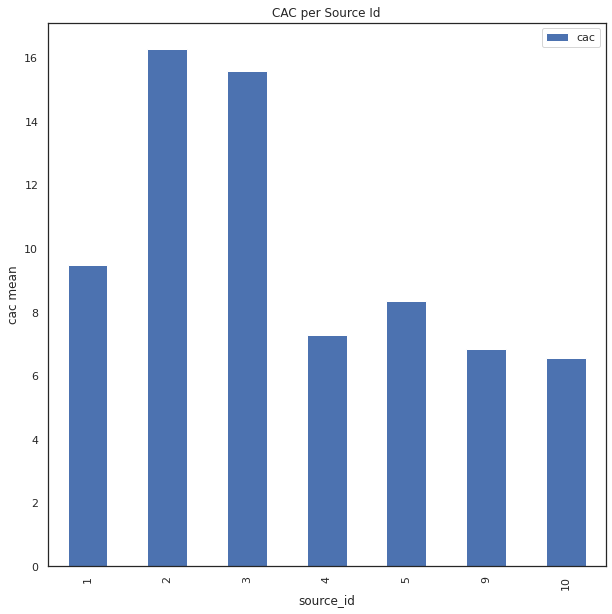

In [148]:
cost_.plot(kind='bar', figsize=(10,10), title='CAC per Source Id', ylabel='cac mean')

Se puede observar que las fuentes 2 y 3 son las que mayor costo de adquisición por cliente tuvieron, con 16 cada una, después en tercer lugar estaría la fuente número 1. 

In [149]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   source_id       2542 non-null   int64         
 1   first_order_dt  2542 non-null   datetime64[ns]
 2   costs           2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [150]:
buyers_and_users_groupby_source_fodt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   source_id       2435 non-null   int64         
 1   first_order_dt  2435 non-null   datetime64[ns]
 2   n_users         2435 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 57.2 KB


##### ¿Cuán rentables eran las inversiones? (ROMI)

In [151]:
visits_log_us.columns

Index(['device', 'session_end', 'source_id', 'session_start', 'uid',
       'sessions_day', 'session_date', 'sessions_year', 'sessions_week',
       'sessions_month', 'sessions_duration_sec'],
      dtype='object')

In [152]:
order_final=orders_log_us
order_final

,buy_ts,revenue,uid,buy_dt,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01


In [153]:
order_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   buy_ts       50415 non-null  datetime64[ns]
 1   revenue      50415 non-null  float64       
 2   uid          50415 non-null  uint64        
 3   buy_dt       50415 non-null  object        
 4   order_month  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1), uint64(1)
memory usage: 1.9+ MB


In [154]:
visit_final=visits_log_us
visit_final

,device,session_end,source_id,session_start,uid,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-20,2017,51,12,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-19,2018,8,2,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-07-01,2017,26,7,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-20,2018,20,5,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,2017-12-27,2017,52,12,0
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,29,2017-07-29,2017,30,7,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,25,2018-01-25,2018,4,1,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,3,2018-03-03,2018,9,3,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2,2017-11-02,2017,44,11,19


Vamos a observar el numero de usuarios unicos que utilizaron dispositivos portatiles o de escritorio

In [155]:
visit_final_gbs=visit_final.groupby('device').agg({'uid':'nunique'}).reset_index()
visit_final_gbs


,device,uid
0,desktop,164523
1,touch,71345


In [156]:
costs_us

,source_id,first_order_dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


A continuación se van a explorar las fechas para ver las coincidencias en los rangos de pedidos y costos, y si hay que realizar ajustes en los dataframes

In [157]:
visit_final['session_start'].describe()

/tmp/ipykernel_159/3591366894.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visit_final['session_start'].describe()


count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: session_start, dtype: object

In [158]:
costs_us['first_order_dt'].describe()

/tmp/ipykernel_159/2433477192.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  costs_us['first_order_dt'].describe()


count                    2542
unique                    364
top       2017-06-28 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: first_order_dt, dtype: object

In [159]:
order_final['buy_ts'].describe()

/tmp/ipykernel_159/2717913862.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_final['buy_ts'].describe()


count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [160]:
#Simplemente revisando el contenido de la columna source_id en el dataframe costs_us
costs_us['source_id'].value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

Después de revisadas las coincidencias se va a eliminar la o las filas que contengan la fecha 2018-06-01 en order_final, para que el rango de fechas sea igual para order_final y costs_us

In [161]:
order_final.drop([50414], axis=0, inplace=True)

In [162]:
#Revisando nuevamente que el dataframe haya quedado en orden
order_final['buy_ts'].describe() 

/tmp/ipykernel_159/646491696.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_final['buy_ts'].describe()


count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

Se realizará los procedimientos para agrupar los datos y crear una cohort, calcular el ltv, cac y finalmente el romi, se trabajará cono los dataframes costs_us y order_final


In [163]:
#Agrupando por uid para obtener firts_order_month
order_final_fom=order_final.groupby('uid').agg({'order_month':'min'}).reset_index()
order_final_fom.columns=['uid', 'first_order_month']
order_final_fom

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36517,18445147675727495770,2017-11-01
36518,18445407535914413204,2017-09-01
36519,18445601152732270159,2018-03-01
36520,18446156210226471712,2018-02-01


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, para cada usuario se tiene su primera orden.
</div>

In [164]:
#Se buscará el numero de usuarios para la cohort
cohort_size=order_final_fom.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_size.columns=['first_order_month', 'n_buyers']
cohort_size.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [165]:
order_final_merge=order_final.merge(order_final_fom, on='uid')
order_final_merge.head()

,buy_ts,revenue,uid,buy_dt,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [166]:
#Se agrupará la tabla order_final_merge por order_month y por first_order_month para tener las ganacias por mes
cohort_=order_final_merge.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
cohort_.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [167]:
#Se juntaran las tablas cohort_ y cohot_size en le datafram report para a continuación buscar el ltv, cac romi
report = pd.merge(cohort_size, cohort_, on='first_order_month')
report.head() 

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, aquí se tiene el revenue y cantidad de clientes para cada cohort a lo largo de su vida. Se perdió el source.
</div>

In [168]:
#A continuación se reasignará el dataframe costs_us a cost_final, despúes se agregará una columna de mes para
#poder unirla a la tabla report, también servirá para calcular los costos mensuales.
cost_final= costs_us
cost_final.head()

,source_id,first_order_dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [169]:
cost_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   source_id       2542 non-null   int64         
 1   first_order_dt  2542 non-null   datetime64[ns]
 2   costs           2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [170]:
cost_final['month']=cost_final['first_order_dt'].astype('datetime64[M]')
cost_final

,source_id,first_order_dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [171]:
#Se agrupará cost_final por month para hallar los costos mensuales
monthly_costs=cost_final.groupby('month').agg({'costs':'sum'})
monthly_costs

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, lo único malo es que se pierde la diferencia por source.
</div>

In [172]:
#Se uniran los monthly_costs con report, para de aquí en adelante calcular cac, ltv y romi
report_=report.merge(monthly_costs, left_on='first_order_month', right_on='month')
report_

,first_order_month,n_buyers,order_month,revenue,costs
0,2017-06-01,2023,2017-06-01,9557.49,18015.00
1,2017-06-01,2023,2017-07-01,981.82,18015.00
2,2017-06-01,2023,2017-08-01,885.34,18015.00
3,2017-06-01,2023,2017-09-01,1931.30,18015.00
4,2017-06-01,2023,2017-10-01,2068.58,18015.00
...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,30415.27
74,2018-03-01,3533,2018-05-01,1114.87,30415.27
75,2018-04-01,2276,2018-04-01,10600.69,22289.38
76,2018-04-01,2276,2018-05-01,1209.92,22289.38


In [173]:
#Crearemos la columna age
report_['age']=((report_['order_month']-report_['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')
#report_['age']=report_['age']
report_.head()

,first_order_month,n_buyers,order_month,revenue,costs,age
0,2017-06-01,2023,2017-06-01,9557.49,18015.0,0
1,2017-06-01,2023,2017-07-01,981.82,18015.0,1
2,2017-06-01,2023,2017-08-01,885.34,18015.0,2
3,2017-06-01,2023,2017-09-01,1931.30,18015.0,3
4,2017-06-01,2023,2017-10-01,2068.58,18015.0,4


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Aquí se pierden algunas combiaciones de first_order_month y order_month al generar los age, por eso quedan espacios en la tabla de cohortes más adelante. Redondea antes dea convertir a entero.
</div>


**Comentario del estudiante** Realicé el redondeo antes de convertirlo a entero, pero observo que aun siguen los espacios en la tabla de cohortes, eso se puede deber a otra causa? 

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

Supongo que haces referencia a lo de la sección 1.6.0.4. Faltó hacer el redondeo en esa parte también.
    
Por otro lado, estos cálculos no son muy correctos, dan gp negativo. Pasa que en realidad debes ver esto por fuente, pues los costos están divididos por fuente. Es mejor dejarlo como lo hiciste en la siguiente sección. 
</div>

Dado que el LTV se calcula sobre la base del beneficio bruto en lugar de los ingresos, debemos encontrar el beneficio bruto restando revenue menos costs.

In [174]:
report_['gp']=report_['revenue']-report_['costs']
report_.head()

,first_order_month,n_buyers,order_month,revenue,costs,age,gp
0,2017-06-01,2023,2017-06-01,9557.49,18015.0,0,-8457.51
1,2017-06-01,2023,2017-07-01,981.82,18015.0,1,-17033.18
2,2017-06-01,2023,2017-08-01,885.34,18015.0,2,-17129.66
3,2017-06-01,2023,2017-09-01,1931.30,18015.0,3,-16083.70
4,2017-06-01,2023,2017-10-01,2068.58,18015.0,4,-15946.42


In [175]:
#Calculo de ltv
report_['ltv']=report_['gp'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,revenue,costs,age,gp,ltv
0,2017-06-01,2023,2017-06-01,9557.49,18015.0,0,-8457.51,-4.180677
1,2017-06-01,2023,2017-07-01,981.82,18015.0,1,-17033.18,-8.419763
2,2017-06-01,2023,2017-08-01,885.34,18015.0,2,-17129.66,-8.467454
3,2017-06-01,2023,2017-09-01,1931.30,18015.0,3,-16083.70,-7.950420
4,2017-06-01,2023,2017-10-01,2068.58,18015.0,4,-15946.42,-7.882561


In [176]:
#Calculo de CAC
report_['cac']=report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,revenue,costs,age,gp,ltv,cac
0,2017-06-01,2023,2017-06-01,9557.49,18015.0,0,-8457.51,-4.180677,8.905091
1,2017-06-01,2023,2017-07-01,981.82,18015.0,1,-17033.18,-8.419763,8.905091
2,2017-06-01,2023,2017-08-01,885.34,18015.0,2,-17129.66,-8.467454,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,18015.0,3,-16083.70,-7.950420,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,18015.0,4,-15946.42,-7.882561,8.905091


In [177]:
#Calculo del ROMI
report_['romi']=report_['ltv'] / report_['cac']
report_.head()

,first_order_month,n_buyers,order_month,revenue,costs,age,gp,ltv,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,18015.0,0,-8457.51,-4.180677,8.905091,-0.469470
1,2017-06-01,2023,2017-07-01,981.82,18015.0,1,-17033.18,-8.419763,8.905091,-0.945500
2,2017-06-01,2023,2017-08-01,885.34,18015.0,2,-17129.66,-8.467454,8.905091,-0.950855
3,2017-06-01,2023,2017-09-01,1931.30,18015.0,3,-16083.70,-7.950420,8.905091,-0.892795
4,2017-06-01,2023,2017-10-01,2068.58,18015.0,4,-15946.42,-7.882561,8.905091,-0.885175


In [178]:
output=report_.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,-0.47,-1.41,-2.37,-3.26,-4.14,-5.06,-5.95,-6.89,-7.83,-8.76,-9.69,-10.67
2017-07-01,-0.37,-1.33,-2.27,-3.23,-4.21,-5.19,-6.18,-7.16,-8.15,-9.13,-10.12,NaN
2017-08-01,-0.51,-1.47,-2.43,-3.39,-4.34,-5.32,-6.30,-7.26,-8.23,-9.22,NaN,NaN
2017-09-01,-0.40,-1.28,-2.23,-2.81,-3.77,-4.70,-5.62,-6.60,-7.58,NaN,NaN,NaN
2017-10-01,-0.40,-1.34,-2.32,-3.30,-4.28,-5.26,-6.25,-7.24,NaN,NaN,NaN,NaN
2017-11-01,-0.45,-1.40,-2.38,-3.35,-4.33,-5.32,-6.31,NaN,NaN,NaN,NaN,NaN
2017-12-01,-0.46,-1.43,-2.32,-3.20,-4.16,-5.13,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,-0.58,-1.55,-2.52,-3.51,-4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,-0.54,-1.51,-2.50,-3.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
report_.tail()

,first_order_month,n_buyers,order_month,revenue,costs,age,gp,ltv,cac,romi
73,2018-03-01,3533,2018-04-01,1063.05,30415.27,1,-29352.22,-8.308016,8.608907,-0.965049
74,2018-03-01,3533,2018-05-01,1114.87,30415.27,2,-29300.40,-8.293348,8.608907,-0.963345
75,2018-04-01,2276,2018-04-01,10600.69,22289.38,0,-11688.69,-5.135628,9.793225,-0.524406
76,2018-04-01,2276,2018-05-01,1209.92,22289.38,1,-21079.46,-9.261626,9.793225,-0.945718
77,2018-05-01,2988,2018-05-01,13925.76,22224.27,0,-8298.51,-2.777279,7.437841,-0.373399


Observando las cohorts mas maduras a partir del cuarto mes tienden a aoumentar los retornos de inversión, hay valores nan que aparecen dentro de la matriz triangular, observnado en la tabla se deben a que en esos periodos el ROMI pudo haber sido negativo lo que significa una pérdida

##### Pasaremos a analizar el comportamiento de las fuentes

In [180]:
cost_final

,source_id,first_order_dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [181]:
cost_final['month_month']=cost_final['month'].astype('datetime64[M]')
cost_final.head()

,source_id,first_order_dt,costs,month,month_month
0,1,2017-06-01,75.20,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-01,2017-06-01


In [182]:
buyers

,uid,first_session_start,first_session_start_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_until_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,107.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,1.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0.0
...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01,96.0
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,0.0
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01,231.0
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01,103.0


In [183]:
users.head()

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


In [184]:
buyers_with_source=buyers.merge(users, left_on='uid', right_index=True)
buyers_with_source.head()

,uid,first_session_start,first_session_start_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_until_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,107.0,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0.0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0.0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,1.0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0.0,5


In [185]:
month_revenue=orders_log_us.groupby(['uid', 'order_month']).agg({'revenue':'sum'}).reset_index()
month_revenue.head()

,uid,order_month,revenue
0,313578113262317,2018-01-01,0.55
1,1575281904278712,2017-06-01,3.05
2,2429014661409475,2017-10-01,73.33
3,2464366381792757,2018-01-01,2.44
4,2551852515556206,2017-11-01,10.99


In [186]:
buyers_with_source=buyers_with_source.merge(month_revenue, on='uid')
buyers_with_source.head()

,uid,first_session_start,first_session_start_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_until_first_purchase,source_id,order_month,revenue
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,107.0,2,2018-01-01,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0.0,10,2017-06-01,3.05
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0.0,3,2017-10-01,73.33
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,1.0,5,2018-01-01,2.44
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0.0,5,2017-11-01,10.99


In [187]:
buyers_with_source['source_id'].value_counts()


3     11590
4     11363
5      7618
2      4246
1      3405
10     1412
9      1383
7         1
Name: source_id, dtype: int64

In [188]:
cost_final.rename(columns={'first_order_dt':'costs_month'}, inplace=True)
cost_final

,source_id,costs_month,costs,month,month_month
0,1,2017-06-01,75.20,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-01,2017-06-01
...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01,2018-05-01


In [189]:
cost_final['source_id'].value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

In [190]:
buyers_with_source.loc[buyers_with_source.loc[:,'source_id']==7]

,uid,first_session_start,first_session_start_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_until_first_purchase,source_id,order_month,revenue
25346,11377414203346034748,2017-08-17 10:28:00,2017-08-17,2017-08-01,2017-08-17 11:20:00,2017-08-17,2017-08-01,0.0,7,2017-08-01,1.22


In [191]:
#Vamos a eliminar la fuente igual a 7 para que no genere errores en los cálculos ya que es un solo valor.
buyers_with_source.drop([25346], axis=0, inplace=True)
#Revisando los cambios
buyers_with_source['source_id'].value_counts()

3     11590
4     11363
5      7618
2      4246
1      3405
10     1412
9      1383
Name: source_id, dtype: int64

In [192]:
cost_final_clean=cost_final
cost_final_clean

,source_id,costs_month,costs,month,month_month
0,1,2017-06-01,75.20,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-01,2017-06-01
...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01,2018-05-01


In [193]:
cost_final_clean=cost_final_clean.drop(['month', 'month_month'], axis=1)
cost_final_clean

,source_id,costs_month,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

La columna costs_month debería ser el mes, pero es la fecha. Lo corregiré
</div>


In [194]:
### CODIGO REVISOR
cost_final_clean=cost_final.groupby(['source_id','month']).agg(costs=('costs','sum')).reset_index().rename(columns={'month':'costs_month'})

In [195]:
#Se crea el dataframe cohort_by_source_and_fom
cohort_by_source_and_fom=buyers_with_source.groupby(['source_id', 'first_order_month']).agg(n_buyers=('uid','nunique')).reset_index()
cohort_by_source_and_fom

,source_id,first_order_month,n_buyers
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340
...,...,...,...
79,10,2018-01-01,92
80,10,2018-02-01,123
81,10,2018-03-01,186
82,10,2018-04-01,107


In [196]:
#Se crea el dataframe cohort_by_revenue
cohort_by_revenue=buyers_with_source.groupby(['source_id', 'first_order_month', 'order_month']).agg(total_revenue=('revenue', 'sum')).reset_index()
cohort_by_revenue

,source_id,first_order_month,order_month,total_revenue
0,1,2017-06-01,2017-06-01,1378.70
1,1,2017-06-01,2017-07-01,414.98
2,1,2017-06-01,2017-08-01,419.43
3,1,2017-06-01,2017-09-01,714.24
4,1,2017-06-01,2017-10-01,811.20
...,...,...,...,...
509,10,2018-03-01,2018-03-01,638.44
510,10,2018-03-01,2018-04-01,12.71
511,10,2018-03-01,2018-05-01,6.29
512,10,2018-04-01,2018-04-01,261.93


In [197]:
#Se uniran los dos dataframes anteriores para comenzar a crear el reporte para el calculo de romi por fuente
romi_report_ids=cohort_by_source_and_fom.merge(cohort_by_revenue, on=['source_id', 'first_order_month'])
romi_report_ids

,source_id,first_order_month,n_buyers,order_month,total_revenue
0,1,2017-06-01,190,2017-06-01,1378.70
1,1,2017-06-01,190,2017-07-01,414.98
2,1,2017-06-01,190,2017-08-01,419.43
3,1,2017-06-01,190,2017-09-01,714.24
4,1,2017-06-01,190,2017-10-01,811.20
...,...,...,...,...,...
509,10,2018-03-01,186,2018-03-01,638.44
510,10,2018-03-01,186,2018-04-01,12.71
511,10,2018-03-01,186,2018-05-01,6.29
512,10,2018-04-01,107,2018-04-01,261.93


In [198]:
romi_report_ids['first_order_month']=pd.to_datetime(romi_report_ids['first_order_month'], format='%Y-%m-%d %H:%m:%s')
romi_report_ids['order_month']=pd.to_datetime(romi_report_ids['order_month'], format='%Y-%m-%d %H:%m:%s')


In [199]:
romi_report_ids['first_order_month_month']=romi_report_ids['first_order_month'].dt.month
romi_report_ids['order_month_month']=romi_report_ids['order_month'].dt.month

In [200]:
#Se crea una función para extraer el mes
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)
#apply the function 
romi_report_ids['order_month_month'] = romi_report_ids['order_month'].apply(get_month)

romi_report_ids

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month
0,1,2017-06-01,190,2017-06-01,1378.70,6,2017-06-01
1,1,2017-06-01,190,2017-07-01,414.98,6,2017-07-01
2,1,2017-06-01,190,2017-08-01,419.43,6,2017-08-01
3,1,2017-06-01,190,2017-09-01,714.24,6,2017-09-01
4,1,2017-06-01,190,2017-10-01,811.20,6,2017-10-01
...,...,...,...,...,...,...,...
509,10,2018-03-01,186,2018-03-01,638.44,3,2018-03-01
510,10,2018-03-01,186,2018-04-01,12.71,3,2018-04-01
511,10,2018-03-01,186,2018-05-01,6.29,3,2018-05-01
512,10,2018-04-01,107,2018-04-01,261.93,4,2018-04-01


In [201]:
#Se crea una función para extraer el mes
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)
#apply the function 
romi_report_ids['first_order_month_month'] = romi_report_ids['first_order_month'].apply(get_month)

romi_report_ids

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month
0,1,2017-06-01,190,2017-06-01,1378.70,2017-06-01,2017-06-01
1,1,2017-06-01,190,2017-07-01,414.98,2017-06-01,2017-07-01
2,1,2017-06-01,190,2017-08-01,419.43,2017-06-01,2017-08-01
3,1,2017-06-01,190,2017-09-01,714.24,2017-06-01,2017-09-01
4,1,2017-06-01,190,2017-10-01,811.20,2017-06-01,2017-10-01
...,...,...,...,...,...,...,...
509,10,2018-03-01,186,2018-03-01,638.44,2018-03-01,2018-03-01
510,10,2018-03-01,186,2018-04-01,12.71,2018-03-01,2018-04-01
511,10,2018-03-01,186,2018-05-01,6.29,2018-03-01,2018-05-01
512,10,2018-04-01,107,2018-04-01,261.93,2018-04-01,2018-04-01


In [202]:
#Calculo de la edad de la cohorte
romi_report_ids['age']=((romi_report_ids['order_month_month']-romi_report_ids['first_order_month_month']) / np.timedelta64(1, 'M')).astype('int')
romi_report_ids

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age
0,1,2017-06-01,190,2017-06-01,1378.70,2017-06-01,2017-06-01,0
1,1,2017-06-01,190,2017-07-01,414.98,2017-06-01,2017-07-01,0
2,1,2017-06-01,190,2017-08-01,419.43,2017-06-01,2017-08-01,2
3,1,2017-06-01,190,2017-09-01,714.24,2017-06-01,2017-09-01,3
4,1,2017-06-01,190,2017-10-01,811.20,2017-06-01,2017-10-01,4
...,...,...,...,...,...,...,...,...
509,10,2018-03-01,186,2018-03-01,638.44,2018-03-01,2018-03-01,0
510,10,2018-03-01,186,2018-04-01,12.71,2018-03-01,2018-04-01,1
511,10,2018-03-01,186,2018-05-01,6.29,2018-03-01,2018-05-01,2
512,10,2018-04-01,107,2018-04-01,261.93,2018-04-01,2018-04-01,0


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

Al cálculo de age le faltó round. Lo corregiré.
</div>

In [203]:
### CODIGO REVISOR
#Calculo de la edad de la cohorte
romi_report_ids['age']=((romi_report_ids['order_month_month']-romi_report_ids['first_order_month_month']) / np.timedelta64(1, 'M')).round().astype('int')
romi_report_ids

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age
0,1,2017-06-01,190,2017-06-01,1378.70,2017-06-01,2017-06-01,0
1,1,2017-06-01,190,2017-07-01,414.98,2017-06-01,2017-07-01,1
2,1,2017-06-01,190,2017-08-01,419.43,2017-06-01,2017-08-01,2
3,1,2017-06-01,190,2017-09-01,714.24,2017-06-01,2017-09-01,3
4,1,2017-06-01,190,2017-10-01,811.20,2017-06-01,2017-10-01,4
...,...,...,...,...,...,...,...,...
509,10,2018-03-01,186,2018-03-01,638.44,2018-03-01,2018-03-01,0
510,10,2018-03-01,186,2018-04-01,12.71,2018-03-01,2018-04-01,1
511,10,2018-03-01,186,2018-05-01,6.29,2018-03-01,2018-05-01,2
512,10,2018-04-01,107,2018-04-01,261.93,2018-04-01,2018-04-01,0


In [204]:
#Cálculo de ltv
romi_report_ids['ltv']=romi_report_ids['total_revenue']/romi_report_ids['n_buyers']
romi_report_ids

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv
0,1,2017-06-01,190,2017-06-01,1378.70,2017-06-01,2017-06-01,0,7.256316
1,1,2017-06-01,190,2017-07-01,414.98,2017-06-01,2017-07-01,1,2.184105
2,1,2017-06-01,190,2017-08-01,419.43,2017-06-01,2017-08-01,2,2.207526
3,1,2017-06-01,190,2017-09-01,714.24,2017-06-01,2017-09-01,3,3.759158
4,1,2017-06-01,190,2017-10-01,811.20,2017-06-01,2017-10-01,4,4.269474
...,...,...,...,...,...,...,...,...,...
509,10,2018-03-01,186,2018-03-01,638.44,2018-03-01,2018-03-01,0,3.432473
510,10,2018-03-01,186,2018-04-01,12.71,2018-03-01,2018-04-01,1,0.068333
511,10,2018-03-01,186,2018-05-01,6.29,2018-03-01,2018-05-01,2,0.033817
512,10,2018-04-01,107,2018-04-01,261.93,2018-04-01,2018-04-01,0,2.447944


In [205]:
#Unir el romi_report_ids con la tabla cost_final_clean
romi_report_ids=romi_report_ids.merge(cost_final_clean.groupby(['source_id', 'costs_month']).agg({'costs':'sum'})
                                          .reset_index(), left_on=['source_id', 'first_order_month'],
                                           right_on=['source_id', 'costs_month'])
romi_report_ids

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv,costs_month,costs
0,1,2017-06-01,190,2017-06-01,1378.70,2017-06-01,2017-06-01,0,7.256316,2017-06-01,1125.61
1,1,2017-06-01,190,2017-07-01,414.98,2017-06-01,2017-07-01,1,2.184105,2017-06-01,1125.61
2,1,2017-06-01,190,2017-08-01,419.43,2017-06-01,2017-08-01,2,2.207526,2017-06-01,1125.61
3,1,2017-06-01,190,2017-09-01,714.24,2017-06-01,2017-09-01,3,3.759158,2017-06-01,1125.61
4,1,2017-06-01,190,2017-10-01,811.20,2017-06-01,2017-10-01,4,4.269474,2017-06-01,1125.61
...,...,...,...,...,...,...,...,...,...,...,...
509,10,2018-03-01,186,2018-03-01,638.44,2018-03-01,2018-03-01,0,3.432473,2018-03-01,526.41
510,10,2018-03-01,186,2018-04-01,12.71,2018-03-01,2018-04-01,1,0.068333,2018-03-01,526.41
511,10,2018-03-01,186,2018-05-01,6.29,2018-03-01,2018-05-01,2,0.033817,2018-03-01,526.41
512,10,2018-04-01,107,2018-04-01,261.93,2018-04-01,2018-04-01,0,2.447944,2018-04-01,388.25


In [206]:
romi_report_ids=romi_report_ids.drop(['costs_month'], axis=1)
romi_report_ids

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv,costs
0,1,2017-06-01,190,2017-06-01,1378.70,2017-06-01,2017-06-01,0,7.256316,1125.61
1,1,2017-06-01,190,2017-07-01,414.98,2017-06-01,2017-07-01,1,2.184105,1125.61
2,1,2017-06-01,190,2017-08-01,419.43,2017-06-01,2017-08-01,2,2.207526,1125.61
3,1,2017-06-01,190,2017-09-01,714.24,2017-06-01,2017-09-01,3,3.759158,1125.61
4,1,2017-06-01,190,2017-10-01,811.20,2017-06-01,2017-10-01,4,4.269474,1125.61
...,...,...,...,...,...,...,...,...,...,...
509,10,2018-03-01,186,2018-03-01,638.44,2018-03-01,2018-03-01,0,3.432473,526.41
510,10,2018-03-01,186,2018-04-01,12.71,2018-03-01,2018-04-01,1,0.068333,526.41
511,10,2018-03-01,186,2018-05-01,6.29,2018-03-01,2018-05-01,2,0.033817,526.41
512,10,2018-04-01,107,2018-04-01,261.93,2018-04-01,2018-04-01,0,2.447944,388.25


In [207]:
#Calculo de cac
romi_report_ids['cac']=romi_report_ids['costs']/romi_report_ids['n_buyers']
romi_report_ids

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv,costs,cac
0,1,2017-06-01,190,2017-06-01,1378.70,2017-06-01,2017-06-01,0,7.256316,1125.61,5.924263
1,1,2017-06-01,190,2017-07-01,414.98,2017-06-01,2017-07-01,1,2.184105,1125.61,5.924263
2,1,2017-06-01,190,2017-08-01,419.43,2017-06-01,2017-08-01,2,2.207526,1125.61,5.924263
3,1,2017-06-01,190,2017-09-01,714.24,2017-06-01,2017-09-01,3,3.759158,1125.61,5.924263
4,1,2017-06-01,190,2017-10-01,811.20,2017-06-01,2017-10-01,4,4.269474,1125.61,5.924263
...,...,...,...,...,...,...,...,...,...,...,...
509,10,2018-03-01,186,2018-03-01,638.44,2018-03-01,2018-03-01,0,3.432473,526.41,2.830161
510,10,2018-03-01,186,2018-04-01,12.71,2018-03-01,2018-04-01,1,0.068333,526.41,2.830161
511,10,2018-03-01,186,2018-05-01,6.29,2018-03-01,2018-05-01,2,0.033817,526.41,2.830161
512,10,2018-04-01,107,2018-04-01,261.93,2018-04-01,2018-04-01,0,2.447944,388.25,3.628505


In [208]:
#Cálculo de romi
romi_report_ids['romi']=romi_report_ids['ltv']/romi_report_ids['cac']
romi_report_ids

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv,costs,cac,romi
0,1,2017-06-01,190,2017-06-01,1378.70,2017-06-01,2017-06-01,0,7.256316,1125.61,5.924263,1.224847
1,1,2017-06-01,190,2017-07-01,414.98,2017-06-01,2017-07-01,1,2.184105,1125.61,5.924263,0.368671
2,1,2017-06-01,190,2017-08-01,419.43,2017-06-01,2017-08-01,2,2.207526,1125.61,5.924263,0.372625
3,1,2017-06-01,190,2017-09-01,714.24,2017-06-01,2017-09-01,3,3.759158,1125.61,5.924263,0.634536
4,1,2017-06-01,190,2017-10-01,811.20,2017-06-01,2017-10-01,4,4.269474,1125.61,5.924263,0.720676
...,...,...,...,...,...,...,...,...,...,...,...,...
509,10,2018-03-01,186,2018-03-01,638.44,2018-03-01,2018-03-01,0,3.432473,526.41,2.830161,1.212819
510,10,2018-03-01,186,2018-04-01,12.71,2018-03-01,2018-04-01,1,0.068333,526.41,2.830161,0.024145
511,10,2018-03-01,186,2018-05-01,6.29,2018-03-01,2018-05-01,2,0.033817,526.41,2.830161,0.011949
512,10,2018-04-01,107,2018-04-01,261.93,2018-04-01,2018-04-01,0,2.447944,388.25,3.628505,0.674643


In [209]:
#Se realizaran filtros por cada una de las fuentes
romi_report_ids1=romi_report_ids.loc[romi_report_ids.loc[:,'source_id']==1]
romi_report_ids1

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv,costs,cac,romi
0,1,2017-06-01,190,2017-06-01,1378.70,2017-06-01,2017-06-01,0,7.256316,1125.61,5.924263,1.224847
1,1,2017-06-01,190,2017-07-01,414.98,2017-06-01,2017-07-01,1,2.184105,1125.61,5.924263,0.368671
2,1,2017-06-01,190,2017-08-01,419.43,2017-06-01,2017-08-01,2,2.207526,1125.61,5.924263,0.372625
3,1,2017-06-01,190,2017-09-01,714.24,2017-06-01,2017-09-01,3,3.759158,1125.61,5.924263,0.634536
4,1,2017-06-01,190,2017-10-01,811.20,2017-06-01,2017-10-01,4,4.269474,1125.61,5.924263,0.720676
...,...,...,...,...,...,...,...,...,...,...,...,...
73,1,2018-03-01,281,2018-04-01,544.81,2018-03-01,2018-04-01,1,1.938826,1893.09,6.736975,0.287789
74,1,2018-03-01,281,2018-05-01,221.64,2018-03-01,2018-05-01,2,0.788754,1893.09,6.736975,0.117078
75,1,2018-04-01,179,2018-04-01,842.12,2018-04-01,2018-04-01,0,4.704581,1327.49,7.416145,0.634370
76,1,2018-04-01,179,2018-05-01,48.24,2018-04-01,2018-05-01,1,0.269497,1327.49,7.416145,0.036339


In [210]:
romi_report_ids_pivot1=romi_report_ids1.pivot_table(index='first_order_month', columns='age'
                                                  , values='romi', aggfunc='mean').cumsum(axis=1)
romi_report_ids_pivot1.index=romi_report_ids_pivot1.index.astype('str')
romi_report_ids_pivot1

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.224847,1.593518,1.966143,2.600679,3.321355,3.667247,4.102993,4.528744,4.912670,5.193673,5.397047,5.679045
2017-07-01,1.087447,1.250848,2.049390,2.274131,2.405115,2.539315,2.605958,2.702315,2.830130,2.977080,3.115465,NaN
2017-08-01,0.889621,1.031761,1.151700,1.266240,1.389626,1.468739,1.549490,1.864952,2.125330,2.217785,NaN,NaN
2017-09-01,0.909009,1.181317,1.265844,1.405616,1.411475,1.425883,1.438725,1.485103,1.574257,NaN,NaN,NaN
2017-10-01,0.883658,1.038674,1.074611,1.131551,1.140840,1.156727,1.183642,1.230737,NaN,NaN,NaN,NaN
2017-11-01,0.979343,1.055375,1.183056,1.301506,1.323140,1.337180,1.347875,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.648129,0.692102,0.732928,0.767666,0.771425,0.784944,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.628027,0.637880,0.653615,0.759581,0.764946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.584628,0.709355,0.717757,0.763854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

Bien, este es la tabla correcta
</div>

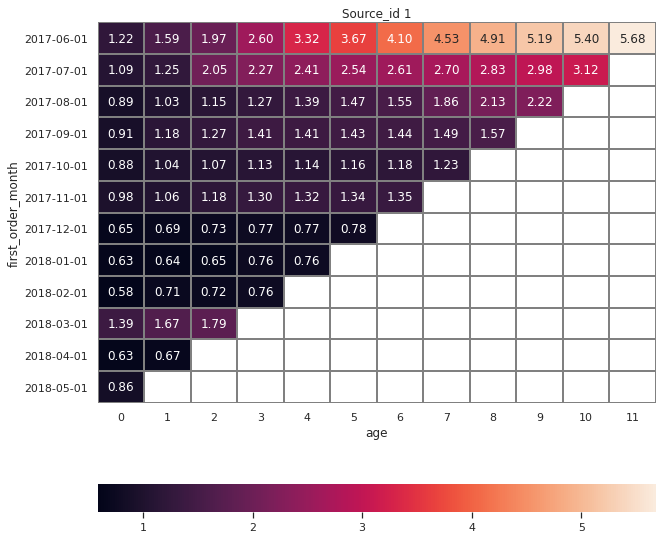

In [211]:
plt.figure(figsize=(10,10))
sns.heatmap(romi_report_ids_pivot1, annot=True, fmt='.2f', linewidths=1,
            linecolor='grey', cbar_kws={'orientation':'horizontal'})
plt.title('Source_id 1')
plt.show()

La cohorte del 01-07-2017 es la que presenta un mayor ROMI, sobre todo a apartir del sexto mes.

In [212]:
romi_report_ids2=romi_report_ids.loc[romi_report_ids.loc[:,'source_id']==2]
romi_report_ids2.head()

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv,costs,cac,romi
78,2,2017-06-01,235,2017-06-01,1043.68,2017-06-01,2017-06-01,0,4.441191,2427.38,10.329277,0.429962
79,2,2017-06-01,235,2017-07-01,115.54,2017-06-01,2017-07-01,1,0.491660,2427.38,10.329277,0.047599
80,2,2017-06-01,235,2017-08-01,63.90,2017-06-01,2017-08-01,2,0.271915,2427.38,10.329277,0.026325
81,2,2017-06-01,235,2017-09-01,452.35,2017-06-01,2017-09-01,3,1.924894,2427.38,10.329277,0.186353
82,2,2017-06-01,235,2017-10-01,391.70,2017-06-01,2017-10-01,4,1.666809,2427.38,10.329277,0.161367


In [213]:
romi_report_ids_pivot2=romi_report_ids2.pivot_table(index='first_order_month', columns='age'
                                                  , values='romi', aggfunc='mean').cumsum(axis=1)
romi_report_ids_pivot2.index=romi_report_ids_pivot2.index.astype('str')


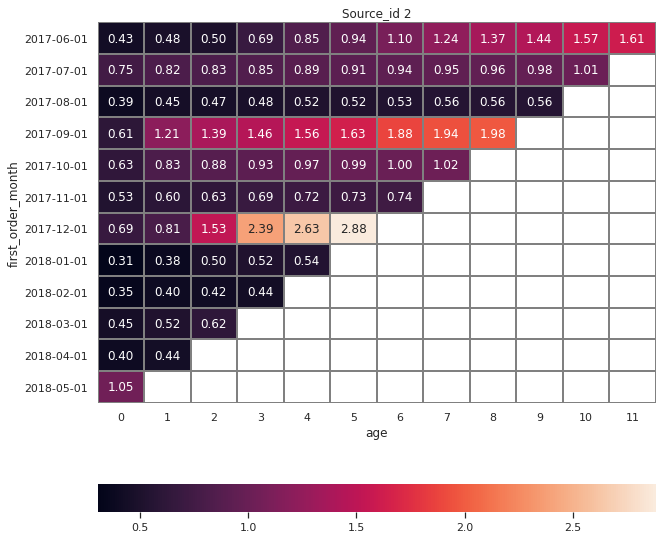

In [214]:
plt.figure(figsize=(10,10))
sns.heatmap(romi_report_ids_pivot2, annot=True, fmt='.2f', linewidths=1,
            linecolor='gray', cbar_kws={'orientation':'horizontal'})
plt.title('Source_id 2')
plt.show()

Las cohortes del 01-10-2017 y 01-012-2017 son las que presentan mejor ROMI, apartir del tercer mes comienza a regresar la inversión.

In [215]:
romi_report_ids3=romi_report_ids.loc[romi_report_ids.loc[:,'source_id']==3]
romi_report_ids3.head()

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv,costs,cac,romi
156,3,2017-06-01,638,2017-06-01,2804.34,2017-06-01,2017-06-01,0,4.395517,7731.65,12.118574,0.362709
157,3,2017-06-01,638,2017-07-01,71.97,2017-06-01,2017-07-01,1,0.112806,7731.65,12.118574,0.009308
158,3,2017-06-01,638,2017-08-01,118.93,2017-06-01,2017-08-01,2,0.186411,7731.65,12.118574,0.015382
159,3,2017-06-01,638,2017-09-01,198.55,2017-06-01,2017-09-01,3,0.311207,7731.65,12.118574,0.025680
160,3,2017-06-01,638,2017-10-01,118.48,2017-06-01,2017-10-01,4,0.185705,7731.65,12.118574,0.015324


In [216]:
romi_report_ids_pivot3=romi_report_ids3.pivot_table(index='first_order_month', columns='age'
                                                  , values='romi', aggfunc='mean').cumsum(axis=1)
romi_report_ids_pivot3.index=romi_report_ids_pivot3.index.astype('str')

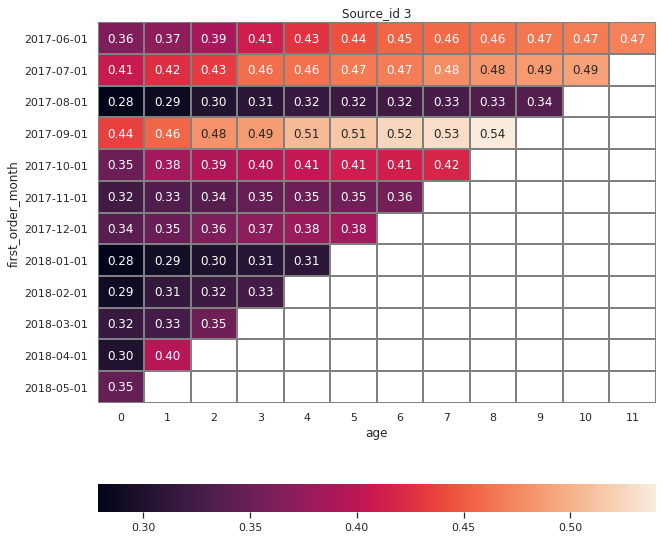

In [217]:
plt.figure(figsize=(10,10))
sns.heatmap(romi_report_ids_pivot3, annot=True, fmt='.2f', linewidths=1,
            linecolor='gray', cbar_kws={'orientation':'horizontal'})
plt.title('Source_id 3')
plt.show()

La cohorte del 01-07-2017 es la que presenta mejor ROMI, a partir del sexto mes.

In [218]:
romi_report_ids4=romi_report_ids.loc[romi_report_ids.loc[:,'source_id']==4]
romi_report_ids4.head()

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv,costs,cac,romi
234,4,2017-06-01,413,2017-06-01,1959.84,2017-06-01,2017-06-01,0,4.745375,3514.8,8.510412,0.557596
235,4,2017-06-01,413,2017-07-01,16.66,2017-06-01,2017-07-01,1,0.040339,3514.8,8.510412,0.004740
236,4,2017-06-01,413,2017-08-01,70.57,2017-06-01,2017-08-01,2,0.170872,3514.8,8.510412,0.020078
237,4,2017-06-01,413,2017-09-01,189.74,2017-06-01,2017-09-01,3,0.459419,3514.8,8.510412,0.053983
238,4,2017-06-01,413,2017-10-01,474.30,2017-06-01,2017-10-01,4,1.148426,3514.8,8.510412,0.134944


In [219]:
romi_report_ids_pivot4=romi_report_ids4.pivot_table(index='first_order_month', columns='age'
                                                  , values='romi', aggfunc='mean').cumsum(axis=1)
romi_report_ids_pivot4.index=romi_report_ids_pivot4.index.astype('str')

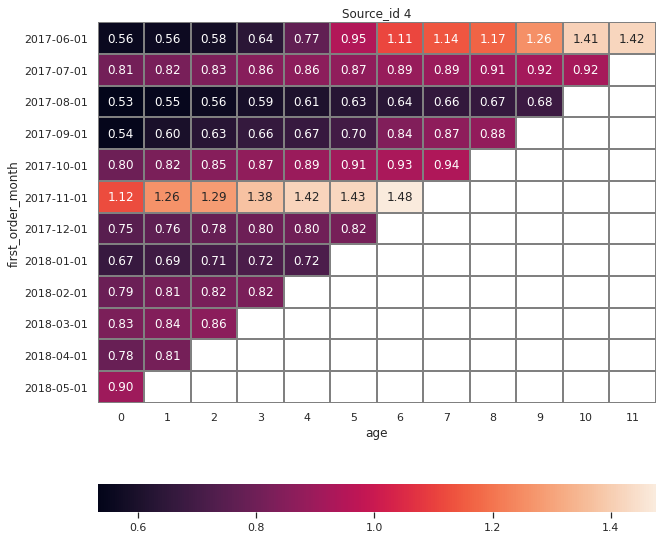

In [220]:
plt.figure(figsize=(10,10))
sns.heatmap(romi_report_ids_pivot4, annot=True, fmt='.2f', linewidths=1,
            linecolor='gray', cbar_kws={'orientation':'horizontal'})
plt.title('Source_id 4')
plt.show()

La cohorte del 01-02-2018 presenta un alto ROMI desde el comienzo.

In [221]:
romi_report_ids5=romi_report_ids.loc[romi_report_ids.loc[:,'source_id']==5]
romi_report_ids5.head()

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv,costs,cac,romi
312,5,2017-06-01,384,2017-06-01,1898.89,2017-06-01,2017-06-01,0,4.945026,2616.12,6.812813,0.725842
313,5,2017-06-01,384,2017-07-01,346.73,2017-06-01,2017-07-01,1,0.902943,2616.12,6.812813,0.132536
314,5,2017-06-01,384,2017-08-01,172.53,2017-06-01,2017-08-01,2,0.449297,2616.12,6.812813,0.065949
315,5,2017-06-01,384,2017-09-01,335.13,2017-06-01,2017-09-01,3,0.872734,2616.12,6.812813,0.128102
316,5,2017-06-01,384,2017-10-01,254.71,2017-06-01,2017-10-01,4,0.663307,2616.12,6.812813,0.097362


In [222]:
romi_report_ids_pivot5=romi_report_ids5.pivot_table(index='first_order_month', columns='age'
                                                  , values='romi', aggfunc='mean').cumsum(axis=1)
romi_report_ids_pivot5.index=romi_report_ids_pivot5.index.astype('str')

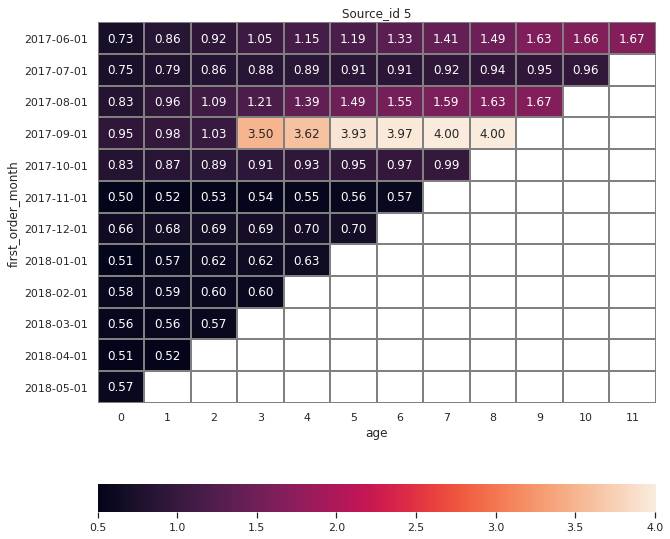

In [223]:
plt.figure(figsize=(10,10))
sns.heatmap(romi_report_ids_pivot5, annot=True, fmt='.2f', linewidths=1,
            linecolor='gray', cbar_kws={'orientation':'horizontal'})
plt.title('Source_id 5')
plt.show()

Las cohortes 01-08-2017 y 01-09-2017 son las que tienen mejor ROMI

In [224]:
romi_report_ids9=romi_report_ids.loc[romi_report_ids.loc[:,'source_id']==9]
romi_report_ids9.head()

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv,costs,cac,romi
390,9,2017-06-01,68,2017-06-01,242.69,2017-06-01,2017-06-01,0,3.568971,285.22,4.194412,0.850887
391,9,2017-06-01,68,2017-07-01,4.88,2017-06-01,2017-07-01,1,0.071765,285.22,4.194412,0.017110
392,9,2017-06-01,68,2017-08-01,39.98,2017-06-01,2017-08-01,2,0.587941,285.22,4.194412,0.140172
393,9,2017-06-01,68,2017-09-01,41.29,2017-06-01,2017-09-01,3,0.607206,285.22,4.194412,0.144765
394,9,2017-06-01,68,2017-10-01,18.19,2017-06-01,2017-10-01,4,0.267500,285.22,4.194412,0.063775


In [225]:
romi_report_ids_pivot9=romi_report_ids9.pivot_table(index='first_order_month', columns='age'
                                                  , values='romi', aggfunc='mean').cumsum(axis=1)
romi_report_ids_pivot9.index=romi_report_ids_pivot9.index.astype('str')

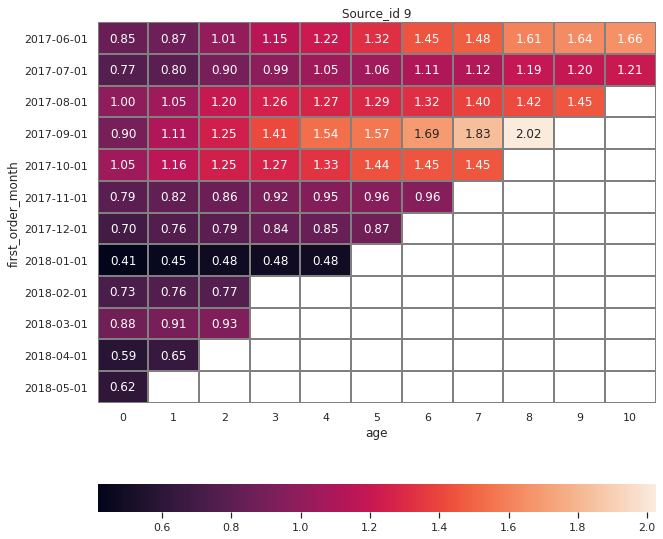

In [226]:
plt.figure(figsize=(10,10))
sns.heatmap(romi_report_ids_pivot9, annot=True, fmt='.2f', linewidths=1,
            linecolor='gray', cbar_kws={'orientation':'horizontal'})
plt.title('Source_id 9')
plt.show()

La cohorte del 01-07-2017 tiene mejor ROMI y lo hace a partir del quinto mes.

In [227]:
romi_report_ids10=romi_report_ids.loc[romi_report_ids.loc[:,'source_id']==10]
romi_report_ids10.head()

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv,costs,cac,romi
466,10,2017-06-01,95,2017-06-01,229.35,2017-06-01,2017-06-01,0,2.414211,314.22,3.307579,0.729903
467,10,2017-06-01,95,2017-07-01,11.06,2017-06-01,2017-07-01,1,0.116421,314.22,3.307579,0.035198
468,10,2017-06-01,95,2018-02-01,0.85,2017-06-01,2018-02-01,8,0.008947,314.22,3.307579,0.002705
469,10,2017-07-01,51,2017-07-01,176.53,2017-07-01,2017-07-01,0,3.461373,329.82,6.467059,0.535231
470,10,2017-07-01,51,2017-08-01,1.59,2017-07-01,2017-08-01,1,0.031176,329.82,6.467059,0.004821


In [228]:
romi_report_ids_pivot10=romi_report_ids10.pivot_table(index='first_order_month', columns='age'
                                                  , values='romi', aggfunc='mean').cumsum(axis=1)
romi_report_ids_pivot10.index=romi_report_ids_pivot10.index.astype('str')

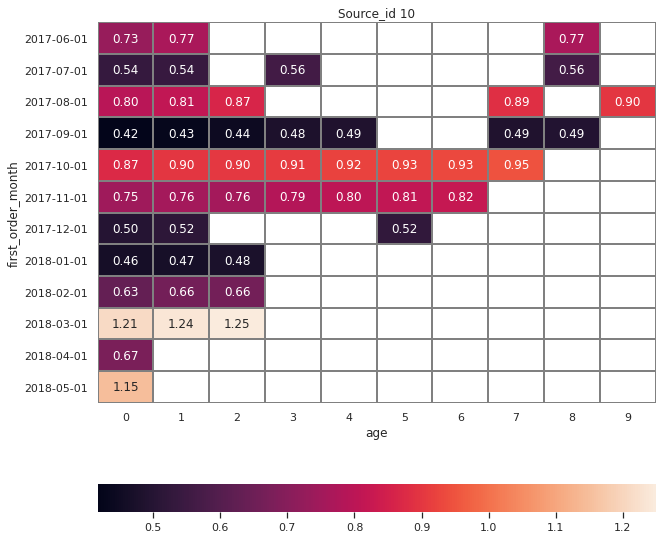

In [229]:
plt.figure(figsize=(10,10))
sns.heatmap(romi_report_ids_pivot10, annot=True, fmt='.2f', linewidths=1,
            linecolor='gray', cbar_kws={'orientation':'horizontal'})
plt.title('Source_id 10')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

En el source 10 es correcto que hayan agujeros pues no siempre se gastó en marketing
</div>

Las cohortes del 01-10-2017 y 01-03-2018 son las que presentan un mayor ROMI, la primera comienza con su retorno a partir del tercer mes y la segunda a partir del segundo mes. 

### Analisis por fuentes

##### Compararemos el uso de devices entre los usuarios

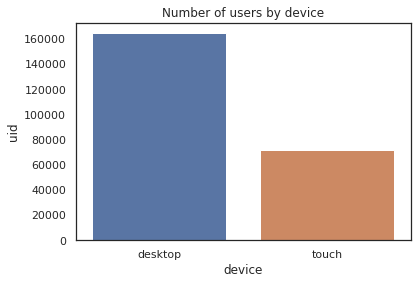

In [230]:
#Gráfico de compración de cantidad de usuarios por dispositivo.


sns.barplot(data= visit_final_gbs, x='device', y='uid')
plt.title('Number of users by device')
plt.show()


Se puede observar claramente que los usuarios prefieren los equipos de escritorio antes que los tactiles, la diferencia es de más del doble.

Ahora observaremos el comportamiento de las fuentes por cada dispositivo

Dispositivo touch

In [231]:
#Crearemos dataframes filtrados por cada uno de los dispositivos(touch y desktop) utilizando el dataset visit_final
#DF para touch

touch=visit_final.query('device=="touch"')
touch.head()

,device,session_end,source_id,session_start,uid,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-20,2017,51,12,1080
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-07-01,2017,26,7,0
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,5,2017-11-05,2017,44,11,60
14,touch,2018-04-23 18:01:00,9,2018-04-23 18:00:00,18026419100367255411,23,2018-04-23,2018,17,4,60
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,12,2018-02-12,2018,7,2,3960


In [232]:
touch_session_duration=touch.groupby('source_id')['sessions_duration_sec'].sum().reset_index()
touch_session_duration

,source_id,sessions_duration_sec
0,1,6132988
1,2,7251267
2,3,8519203
3,4,15385651
4,5,6524885
5,6,180
6,7,3840
7,9,1406296
8,10,1218676


Limpiaremos el dataframe creado para quedarnos con las fuentes originales con las que se ha venido trabajando, es decir eliminaremos las fuentes 6 y 7. De igual forma el tiempo de suración para estas fuentes es muy bajo en comparación con las otras fuentes.

In [233]:
touch_session_duration.drop([5,6], axis=0, inplace=True)
touch_session_duration

,source_id,sessions_duration_sec
0,1,6132988
1,2,7251267
2,3,8519203
3,4,15385651
4,5,6524885
7,9,1406296
8,10,1218676


In [234]:
touch_session_duration.sort_values(by='sessions_duration_sec', ascending=False)

,source_id,sessions_duration_sec
3,4,15385651
2,3,8519203
1,2,7251267
4,5,6524885
0,1,6132988
7,9,1406296
8,10,1218676


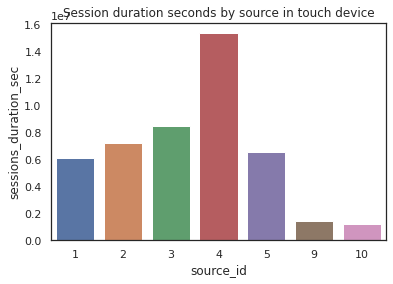

In [235]:
sns.barplot(data= touch_session_duration, x='source_id', y='sessions_duration_sec')
plt.title('Session duration seconds by source in touch device')
plt.show()

Se observa en la gráfica que la fuente 4 es la que más tiempo en segundos a captado para los usuarios con dispositivos touch, con 15.385.651 segundos.

Dispositivo Desktop


In [236]:
desktop=visit_final.query('device=="desktop"')
desktop.head()

,device,session_end,source_id,session_start,uid,sessions_day,session_date,sessions_year,sessions_week,sessions_month,sessions_duration_sec
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-19,2018,8,2,1680
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-20,2018,20,5,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,2017-12-27,2017,52,12,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,3,2017-09-03,2017,35,9,60
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,30,2018-01-30,2018,5,1,3360


In [237]:
desktop_session_duration=desktop.groupby('source_id')['sessions_duration_sec'].sum().reset_index()
desktop_session_duration

,source_id,sessions_duration_sec
0,1,29331054
1,2,32979240
2,3,40559615
3,4,41602808
4,5,28716801
5,6,8040
6,7,18000
7,9,6195364
8,10,5422324


In [238]:
#Nuevamente limpiaremos las fuentes 6 y 7, como en el caso anterior.
desktop_session_duration.drop([5,6], axis=0, inplace=True)
desktop_session_duration

,source_id,sessions_duration_sec
0,1,29331054
1,2,32979240
2,3,40559615
3,4,41602808
4,5,28716801
7,9,6195364
8,10,5422324


In [239]:
desktop_session_duration.sort_values(by='sessions_duration_sec', ascending=False)

,source_id,sessions_duration_sec
3,4,41602808
2,3,40559615
1,2,32979240
0,1,29331054
4,5,28716801
7,9,6195364
8,10,5422324


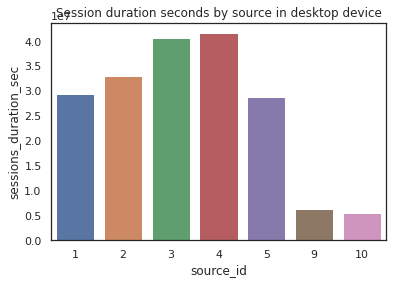

In [240]:
sns.barplot(data= desktop_session_duration, x='source_id', y='sessions_duration_sec')
plt.title('Session duration seconds by source in desktop device')
plt.show()

Para los disposotivos desktop las fuentes 3 y 4 están muy similares en tiempo de sesiones con 41.602.808 segundos para la fuente 4 y 40.559.615 para la fuente 3. 

##### Costos por periodo por fuente

In [241]:
#vamos a utilizar el DF cost_final_clean para realizar estas comparaciones entre las fuentes.
cost_sources=cost_final_clean
cost_sources

,source_id,costs_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [242]:
cost_sources['period']=cost_sources['costs_month'].dt.to_period('M')
cost_sources

,source_id,costs_month,costs,period
0,1,2017-06-01,1125.61,2017-06
1,1,2017-07-01,1072.88,2017-07
2,1,2017-08-01,951.81,2017-08
3,1,2017-09-01,1502.01,2017-09
4,1,2017-10-01,2315.75,2017-10
...,...,...,...,...
79,10,2018-01-01,614.35,2018-01
80,10,2018-02-01,480.88,2018-02
81,10,2018-03-01,526.41,2018-03
82,10,2018-04-01,388.25,2018-04


In [243]:
monthly_cost_by_source=cost_sources.groupby(['source_id', 'period'])['costs'].sum()
monthly_cost_by_source

source_id  period 
1          2017-06    1125.61
           2017-07    1072.88
           2017-08     951.81
           2017-09    1502.01
           2017-10    2315.75
                       ...   
10         2018-01     614.35
           2018-02     480.88
           2018-03     526.41
           2018-04     388.25
           2018-05     409.86
Name: costs, Length: 84, dtype: float64

Text(0, 0.5, 'costs')

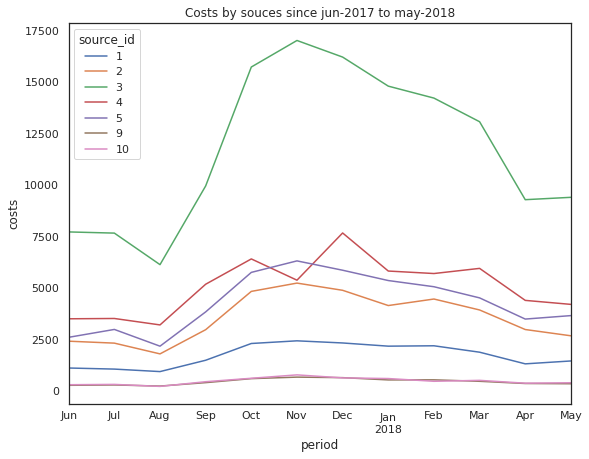

In [244]:
monthly_cost_by_source.unstack(level=0).plot(kind='line', figsize=(9,7))
plt.title('Costs by souces since jun-2017 to may-2018')
plt.ylabel('costs')

##### Ganancias por fuente

In [245]:
#Para esto se utilizará el DF romi_report_ids que contiene las fuentes y las ganancias
revenue_per_source=romi_report_ids
revenue_per_source.head()

,source_id,first_order_month,n_buyers,order_month,total_revenue,first_order_month_month,order_month_month,age,ltv,costs,cac,romi
0,1,2017-06-01,190,2017-06-01,1378.70,2017-06-01,2017-06-01,0,7.256316,1125.61,5.924263,1.224847
1,1,2017-06-01,190,2017-07-01,414.98,2017-06-01,2017-07-01,1,2.184105,1125.61,5.924263,0.368671
2,1,2017-06-01,190,2017-08-01,419.43,2017-06-01,2017-08-01,2,2.207526,1125.61,5.924263,0.372625
3,1,2017-06-01,190,2017-09-01,714.24,2017-06-01,2017-09-01,3,3.759158,1125.61,5.924263,0.634536
4,1,2017-06-01,190,2017-10-01,811.20,2017-06-01,2017-10-01,4,4.269474,1125.61,5.924263,0.720676


In [246]:
monthly_revenue=revenue_per_source.groupby(['source_id', 'order_month'])['total_revenue'].sum().reset_index()
monthly_revenue

,source_id,order_month,total_revenue
0,1,2017-06-01,1378.70
1,1,2017-07-01,1581.68
2,1,2017-08-01,1441.49
3,1,2017-09-01,3071.61
4,1,2017-10-01,3621.82
...,...,...,...
79,10,2018-01-01,304.53
80,10,2018-02-01,338.30
81,10,2018-03-01,679.51
82,10,2018-04-01,286.50


In [247]:
monthly_revenue['period']=monthly_revenue['order_month'].dt.to_period('M')
monthly_revenue

,source_id,order_month,total_revenue,period
0,1,2017-06-01,1378.70,2017-06
1,1,2017-07-01,1581.68,2017-07
2,1,2017-08-01,1441.49,2017-08
3,1,2017-09-01,3071.61,2017-09
4,1,2017-10-01,3621.82,2017-10
...,...,...,...,...
79,10,2018-01-01,304.53,2018-01
80,10,2018-02-01,338.30,2018-02
81,10,2018-03-01,679.51,2018-03
82,10,2018-04-01,286.50,2018-04


In [248]:
monthly_revenue_by_source=monthly_revenue.groupby(['source_id', 'period'])['total_revenue'].sum()
monthly_revenue_by_source

source_id  period 
1          2017-06    1378.70
           2017-07    1581.68
           2017-08    1441.49
           2017-09    3071.61
           2017-10    3621.82
                       ...   
10         2018-01     304.53
           2018-02     338.30
           2018-03     679.51
           2018-04     286.50
           2018-05     505.46
Name: total_revenue, Length: 84, dtype: float64

Text(0, 0.5, 'revenue')

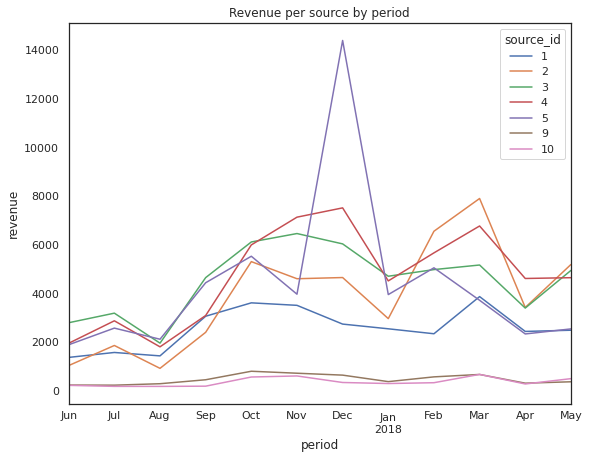

In [249]:
monthly_revenue_by_source.unstack(level=0).plot(kind='line', figsize=(9,7))
plt.title('Revenue per source by period')
plt.ylabel('revenue')

Text(0, 0.5, 'total revenue')

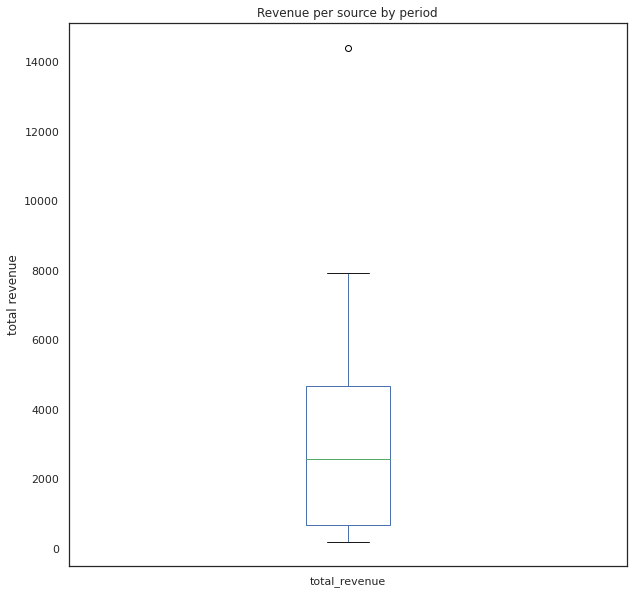

In [250]:
monthly_revenue_by_source.plot(kind='box', figsize=(10,10))
plt.title('Revenue per source by period')
plt.ylabel('total revenue')

El valor para la fuente 5 de mas de 14000 es un valor fuera de rango.

## Conclusiones y Recomendaciones

* Los costos en general presentaron un incremento en el periodo agosto octubre  de 2017, siendo para la fuente 3 el más alto, llegando al pico máximo por arriba de los 17.000 en noviembre de 2017.

* A partir de noviembre de 2017, todas las fuentes presentan una disminución de costo mes a mes.

* Las fuentes 9 y 10, son las que presentan la menor duración en segundo de las sesiones, en ambos dispositivos, tanto para touch y desktop.

* Las fuentes con mayor tiempo de duración de sesión para desktop son las fuentes 4 y 3 respectivamente, para los dispositivos touch es la fuente 4 la que tiene el mayor tiempo de duración de sesión.

* Se observó que el número de usuarios para desktop son muy superiores a los que utilizan dispositivos touch; **se recomienda aumentar la inversión en fuentes para atraer usuarios con dispositivos touch.**

* Las fuentes que tienen mayor CAC son las fuentes 2 y 3, por arriba de 15 cada una, las de menor CAC son las fuentes 9 y 10con poco más de 6.

* Las ganancias por fuente están en un rango de 1900 hasta 7000 póximadamente, las fuentes que más generan ganancias por periodo son la 2, 3 y 4. La fuente 5 también presenta ganancias en ese rango, pero en el mes de diciembre presenta un valor atipico.

* Las fuentes 9 y 10, son las que presentan menos trafico en tiempo de duración de sesiones, tienen los CAC más bajos y las ganancias más bajas. **Bajo estos resultados se puede dejar de invertir en estas fuentes y potenciar la fuente 1.**

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien, las conclusiones finales son bastante directas. Sin embargo, comento las que no me parecen muy bien:
    
 - La fuente 5 tal vez es muy potente en navidad, valdría la pena explorar por qué tanto más que las otras.
 - Ojo que el CAC es un costo, por lo tanto significa que las fuentes 9 y 10, si bien traen poco tráfico, el costo para tener un usuario es bajo.
</div>